In [1]:
# Downloading the Dataset Stored in Google Drive
!gdown --id 17LoZfbDHog3A_GlTkzg_NoXWCY1sKEke
!gdown --id 1lOTAe_YV-NOVmIWPVvZghrXUTc8aDVYf

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=17LoZfbDHog3A_GlTkzg_NoXWCY1sKEke
To: /content/Avito_train.zip
100% 333M/333M [00:01<00:00, 167MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1lOTAe_YV-NOVmIWPVvZghrXUTc8aDVYf
To: /content/Avito_test.zip
100% 116M/116M [00:00<00:00, 219MB/s]


In [2]:
!unzip Avito_train.zip
!unzip Avito_test.zip

Archive:  Avito_train.zip
  inflating: train.csv               
Archive:  Avito_test.zip
  inflating: test.csv                


In [3]:
# Installing this for text translation
!pip install translate

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
# Importing all the required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from translate import Translator
import scipy
import scipy.stats as stats
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [38]:
# Loading Train and Test Dataset
tr_df=pd.read_csv("train.csv")
te_df=pd.read_csv("test.csv")
print("Train data has",tr_df.shape[0],"datapoints and",tr_df.shape[1],"features")
print("Test data has",te_df.shape[0],"datapoints and",te_df.shape[1],"features")

Train data has 1503424 datapoints and 18 features
Test data has 508438 datapoints and 17 features


All the attributes in the dataset are respectively :
* item_id - Ad id.




* user_id - User id.




* region - Ad region.





* city - Ad city.




* parent_category_name - Top level ad category as classified by Avito’s ad model.




* category_name - Fine grain ad category as classified by Avito’s ad model.





* param_1 - Optional parameter from Avito’s ad model.





* param_2 - Optional parameter from Avito’s ad model.






* param_3 - Optional parameter from Avito’s ad model.





* title - Ad title.






* description - Ad description.






* price - Ad price.





* item_seq_number - Ad sequential number for user.





* activation_date- Date ad was placed.






* user_type - User type.






* image - Id code of image. Ties to a jpg file in train_jpg. Not every ad has an image.






* image_top_1 - Avito’s classification code for the image.






* deal_probability - The target variable. This is the likelihood that an ad actually sold something. It’s not possible to verify every transaction with certainty, so this column’s value can be any float from zero to one.

Test Data does not have deal_probability feature. we need to predict this deal_probability feature for the test data

In [ ]:
# Checking percentage of missing values
missing = tr_df.isna().sum() * 100 / len(tr_df)
missing_values = pd.DataFrame({'column': tr_df.columns,'percent_missing': missing})
missing_values

column  percent_missing
item_id                            item_id         0.000000
user_id                            user_id         0.000000
region                              region         0.000000
city                                  city         0.000000
parent_category_name  parent_category_name         0.000000
category_name                category_name         0.000000
param_1                            param_1         4.095718
param_2                            param_2        43.536753
param_3                            param_3        57.373369
title                                title         0.000000
description                    description         7.734079
price                                price         5.677839
item_seq_number            item_seq_number         0.000000
activation_date            activation_date         0.000000
user_type                        user_type         0.000000
image                                image         7.488772
image_top_1                    image_top_1         7.488772
deal_probability          deal_probability         0.000000

10 Features does not have any missing values in train data

#### Imputing Missing Features for Optional parameter 1,2 and 3 for Avito AD

In [23]:
tr_df['param_1'].fillna("missing", inplace = True)
tr_df['param_2'].fillna("missing", inplace = True)
tr_df['param_3'].fillna("missing", inplace = True)

### Checking Number of Common AD Characteristics in Train and Test Data using Venn Diagram

#### AD Title

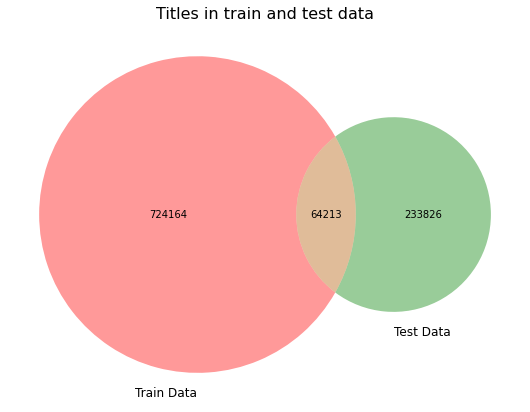

In [ ]:
from matplotlib_venn import venn2

plt.figure(figsize=(10,7))
venn2([set(tr_df['title'].unique()), set(te_df['title'].unique())], 
      set_labels = ('Train Data', 'Test Data'))
plt.title("Titles in train and test data", fontsize = 16)
plt.axis('off')
plt.show()

* There are 724,164 Titles which solely belongs to Train Data, whereas there are 233,826 Titles exclusively belonging to Test Data.
* There are 64,213 Titles which are there in both Train as well as Test Data.

#### User ID

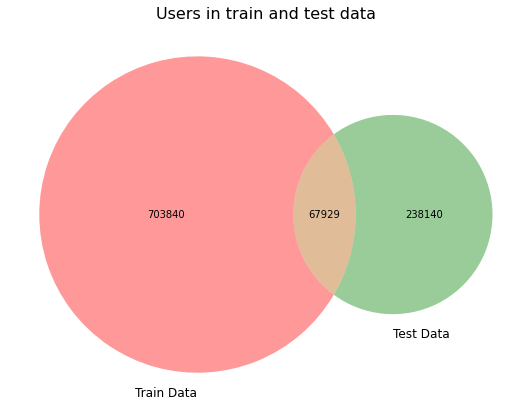

In [ ]:
plt.figure(figsize=(10,7))
venn2([set(tr_df['user_id'].unique()), set(te_df['user_id'].unique())], 
      set_labels = ('Train Data', 'Test Data'))
plt.title("Users in train and test data", fontsize = 16)
plt.axis('off')
plt.show()

* There are 703,840 Users which solely belongs to Train Data, whereas there are 238,140 Users exclusively belonging to Test Data.
* There are 67,929 Users which belongs to both Train as well as Test Data.

#### Item 

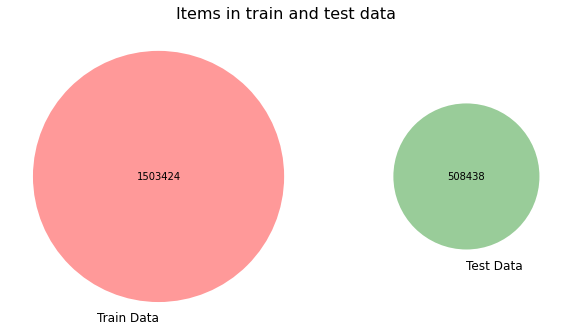

In [ ]:
plt.figure(figsize=(10,7))
venn2([set(tr_df['item_id'].unique()), set(te_df['item_id'].unique())], 
      set_labels = ('Train Data', 'Test Data'))
plt.title("Items in train and test data", fontsize = 16)
plt.axis('off')
plt.show()

* Items in Train and Test Data are Mutually Exlcusive of Each other.
* There are 1,503,424 Items which solely belongs to Train Data, whereas there are 508,438 Items exclusively belonging to Test Data.

#### City

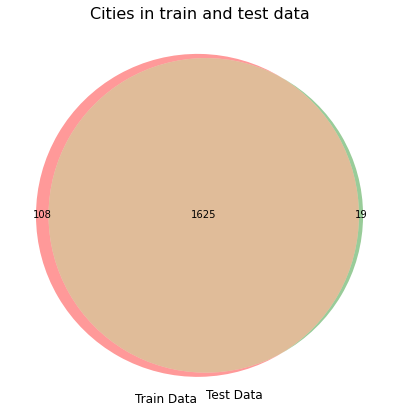

In [ ]:
plt.figure(figsize=(10,7))
venn2([set(tr_df['city'].unique()), set(te_df['city'].unique())], 
      set_labels = ('Train Data', 'Test Data'))
plt.title("Cities in train and test data", fontsize = 16)
plt.axis('off')
plt.show()

* There are 108 Cities which solely belongs to Train Data, whereas there are 19 Cities exclusively belonging to Test Data.
* There are 1,625 Cities which are there in both Train as well as Test Data.

#### Description

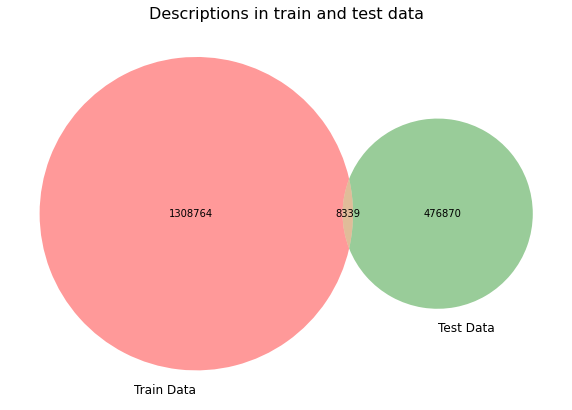

In [ ]:
plt.figure(figsize=(10,7))
venn2([set(tr_df['description'].unique()), set(te_df['description'].unique())], 
      set_labels = ('Train Data', 'Test Data'))
plt.title("Descriptions in train and test data", fontsize = 16)
plt.axis('off')
plt.show()

* There are 1,308,764 Descriptions which solely belongs to Train Data, whereas there are 476,870 Descriptions exclusively belonging to Test Data.
* There are 8,339 Descriptions which are there in both Train as well as Test Data.

#### AD Price

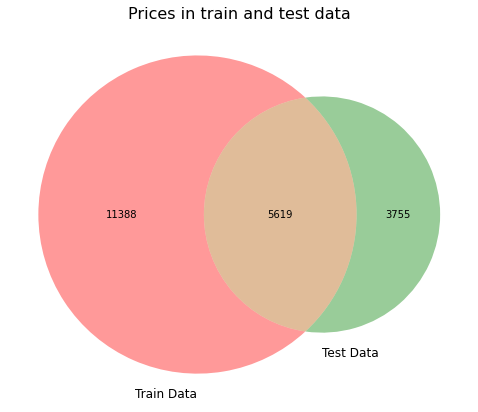

In [ ]:
plt.figure(figsize=(10,7))
venn2([set(tr_df['price'].unique()), set(te_df['price'].unique())], 
      set_labels = ('Train Data', 'Test Data'))
plt.title("Prices in train and test data", fontsize = 16)
plt.axis('off')
plt.show()

* There are 11,388 AD Prices which solely belongs to Train Data, whereas there are 3,755 AD Prices exclusively belonging to Test Data.
* There are 5,619 AD Prices which are there in both Train as well as Test Data.

#### Ad Sequential number

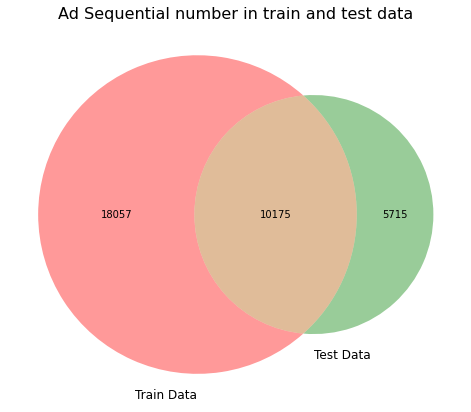

In [ ]:
plt.figure(figsize=(10,7))
venn2([set(tr_df['item_seq_number'].unique()), set(te_df['item_seq_number'].unique())], 
      set_labels = ('Train Data', 'Test Data'))
plt.title("Ad Sequential number in train and test data", fontsize = 16)
plt.axis('off')
plt.show()

* There are 18,057 Ad Sequential number which solely belongs to Train Data, whereas there are 5,715 Ad Sequential number exclusively belonging to Test Data.
* There are 10,175 Ad Sequential number which are there in both Train as well as Test Data.

#### Ad Activation Date

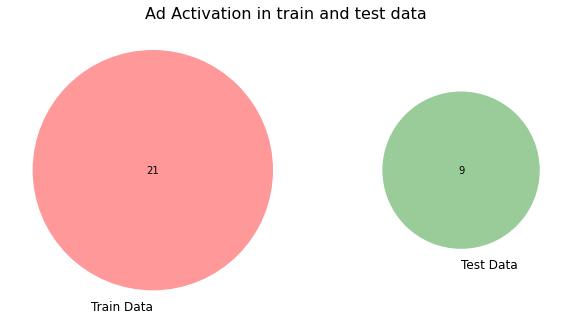

In [ ]:
plt.figure(figsize=(10,7))
venn2([set(tr_df['activation_date'].unique()), set(te_df['activation_date'].unique())], 
      set_labels = ('Train Data', 'Test Data'))
plt.title("Ad Activation in train and test data", fontsize = 16)
plt.axis('off')
plt.show()

* Ad Activation Date in Train and Test Data are Mutually Exlcusive of Each other.
* There are 21 Ad Activation Date which solely belongs to Train Data, whereas there are 9 Ad Activation Date exclusively belonging to Test Data.

### Checking DataTypes for Each feature

In [ ]:
tr_df.dtypes

item_id                  object
user_id                  object
region                   object
city                     object
parent_category_name     object
category_name            object
param_1                  object
param_2                  object
param_3                  object
title                    object
description              object
price                   float64
item_seq_number           int64
activation_date          object
user_type                object
image                    object
image_top_1             float64
deal_probability        float64
dtype: object

### Checking the counting of Unique values for each feature

In [ ]:
unique_id = len(pd.unique(tr_df.item_id))
unique_user = len(pd.unique(tr_df.user_id))
unique_region = len(pd.unique(tr_df.region))
unique_city = len(pd.unique(tr_df.city))
unique_pcat = len(pd.unique(tr_df.parent_category_name))
unique_cname = len(pd.unique(tr_df.category_name))
unique_p1 = len(pd.unique(tr_df.param_1))
unique_p2 = len(pd.unique(tr_df.param_2))
unique_p3 = len(pd.unique(tr_df.param_3))
unique_title = len(pd.unique(tr_df.title))
unique_des = len(pd.unique(tr_df.description))
unique_price = len(pd.unique(tr_df.price))
unique_isn = len(pd.unique(tr_df.item_seq_number))
unique_adate = len(pd.unique(tr_df.activation_date))
unique_utype = len(pd.unique(tr_df.user_type))
unique_img = len(pd.unique(tr_df.image))
unique_itop1 = len(pd.unique(tr_df.image_top_1))
unique_dp = len(pd.unique(tr_df.deal_probability))

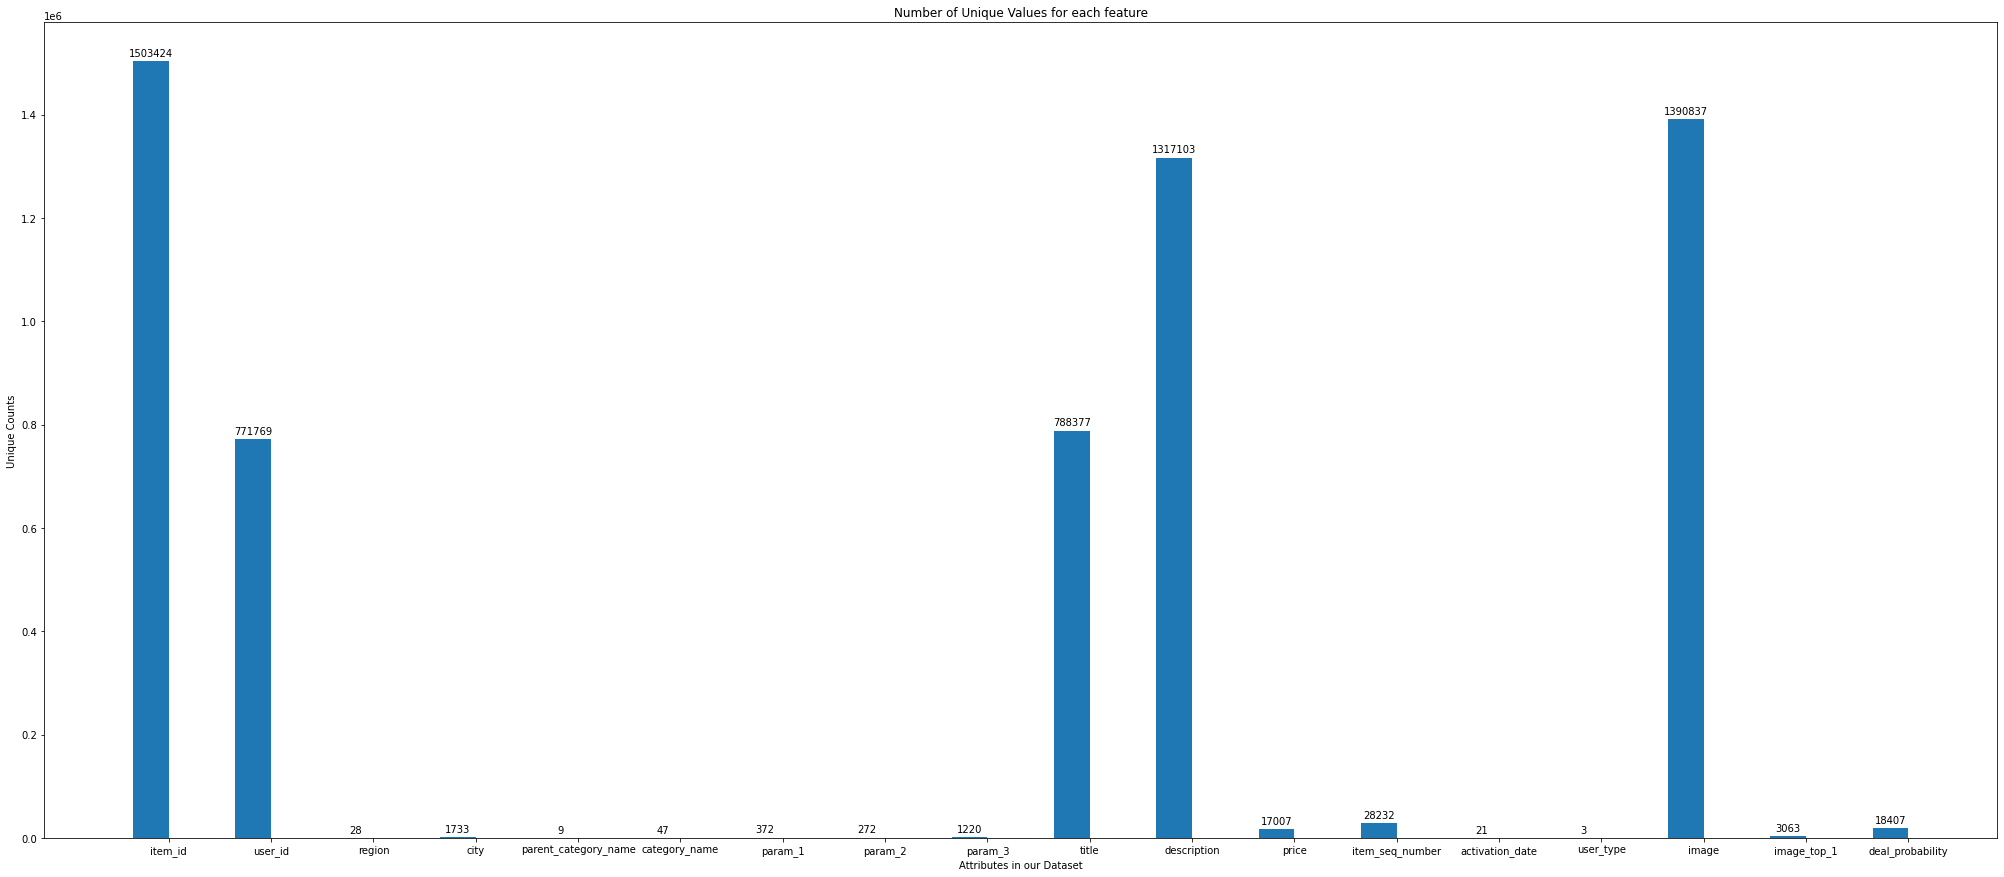

In [ ]:
columns = ['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability']
counts = [unique_id,unique_user,unique_region,unique_city,unique_pcat,
            unique_cname,unique_p1,unique_p2,unique_p3,unique_title,
            unique_des,unique_price,unique_isn,unique_adate,unique_utype,
            unique_img,unique_itop1,unique_dp]
fig, ax = plt.subplots(figsize=(35,15))

x=np.arange(len(columns))
ax.set_ylabel('Unique Counts')
ax.set_xlabel('Attributes in our Dataset')
ax.set_title('Number of Unique Values for each feature')
ax.set_xticks(x)
ax.set_xticklabels(columns)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='population')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')


In [ ]:
tr_df.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability'],
      dtype='object')

### Deal Probability Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Deal Probabilities Values')

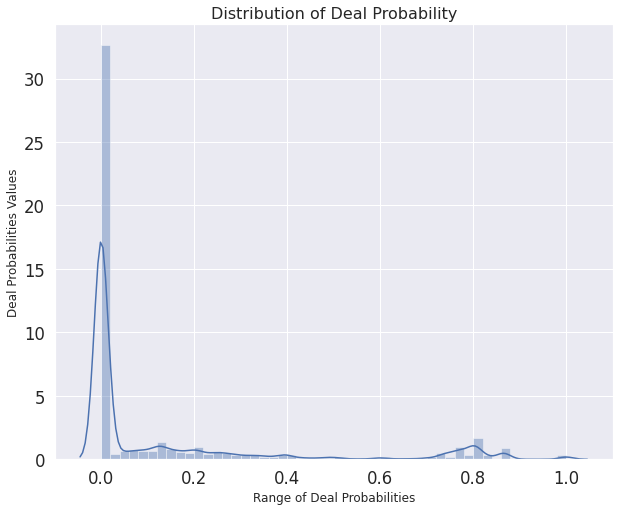

In [ ]:
plt.figure(figsize=(10, 8))
sns.distplot(tr_df['deal_probability'])
plt.title('Distribution of Deal Probability', fontsize = 16)
plt.xlabel('Range of Deal Probabilities', fontsize = 12)
plt.ylabel('Deal Probabilities Values', fontsize = 12)
# looking at the inter-quantile range of the plot

### Deal Probability Probability Plot

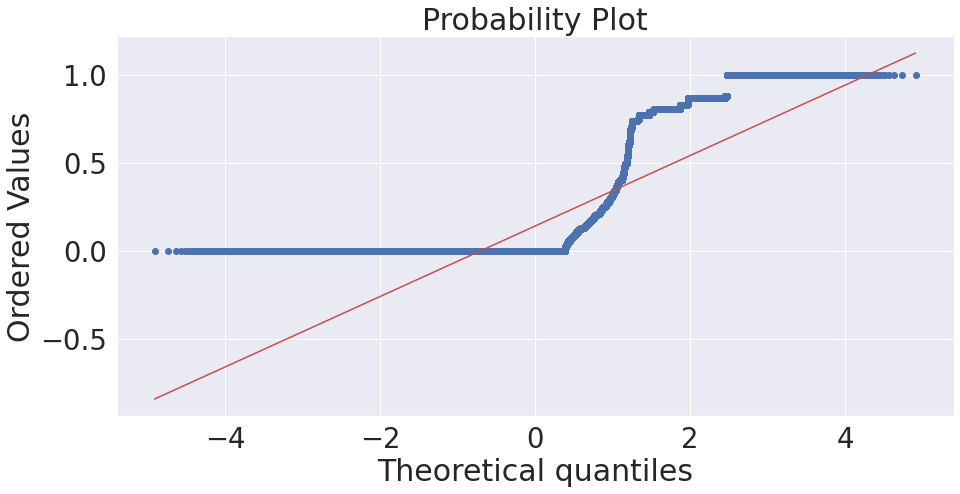

In [ ]:
plt.figure(figsize=(15, 7))
stats.probplot(tr_df['deal_probability'], plot = plt)
plt.show()

### Histogram of AD Price

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'AD Price Values')

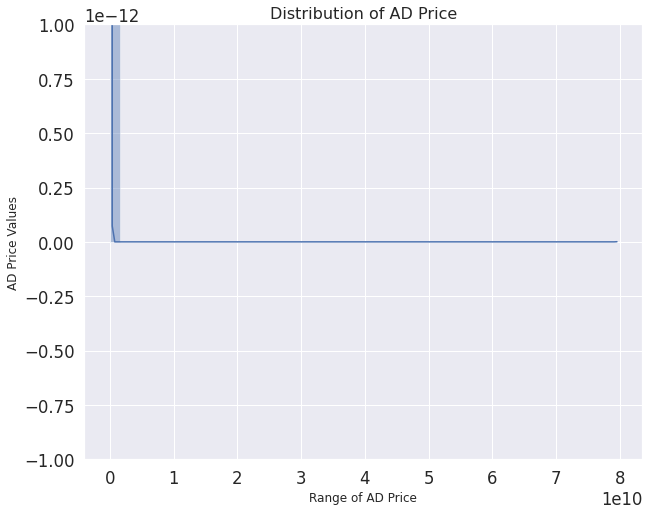

In [ ]:
plt.figure(figsize=(10, 8))
sns.distplot(tr_df['price'])
plt.title('Distribution of AD Price', fontsize = 16)
plt.xlabel('Range of AD Price', fontsize = 12)
plt.ylabel('AD Price Values', fontsize = 12)
# looking at the inter-quantile range of the plot

### AD Price Probability Plot

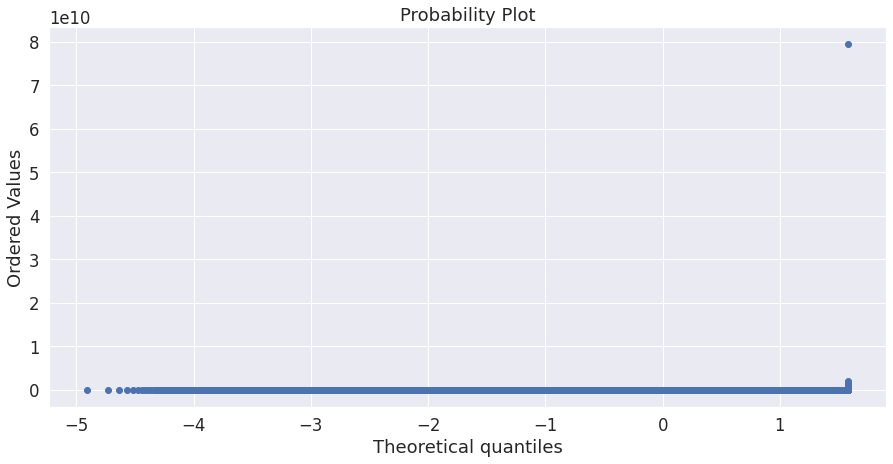

In [ ]:
plt.figure(figsize=(15, 7))
stats.probplot(tr_df['price'], plot = plt)
plt.show()

### Log Transformation of Price and Checking the Distribution and Histogram

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


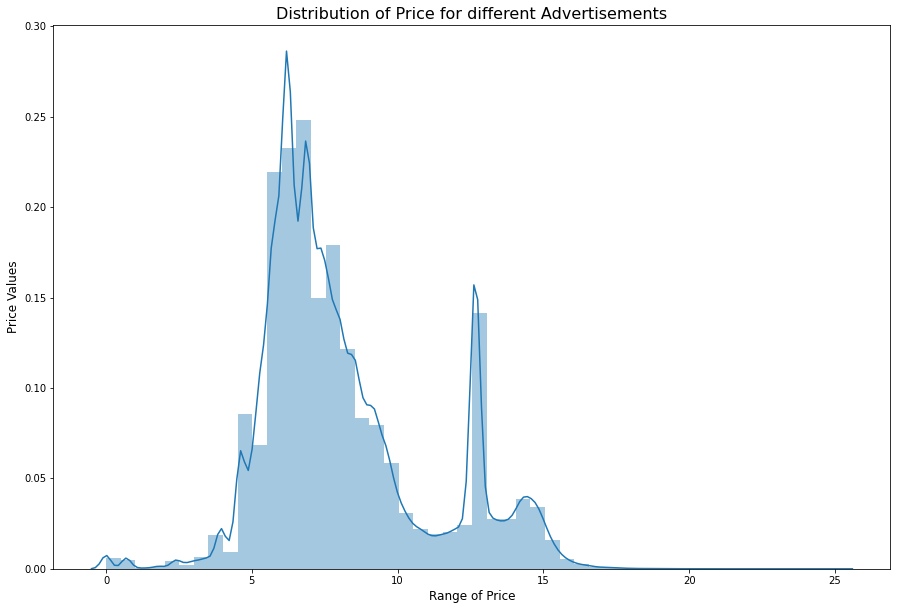

In [6]:
tr_df['price'].fillna(np.nanmean(tr_df['price'].values), inplace = True)

# applying log transformations to the price attribute
tr_df['price'] = np.log1p(tr_df['price'])

# checking the most busiest days at the avito advertsing agency
plt.figure(figsize=(15,10))
sns.distplot(tr_df['price'])
plt.title('Distribution of Price for different Advertisements', fontsize = 16)
plt.xlabel('Range of Price', fontsize = 12)
plt.ylabel('Price Values', fontsize = 12)
plt.show()

### Probability Plot of Price after log transformation 

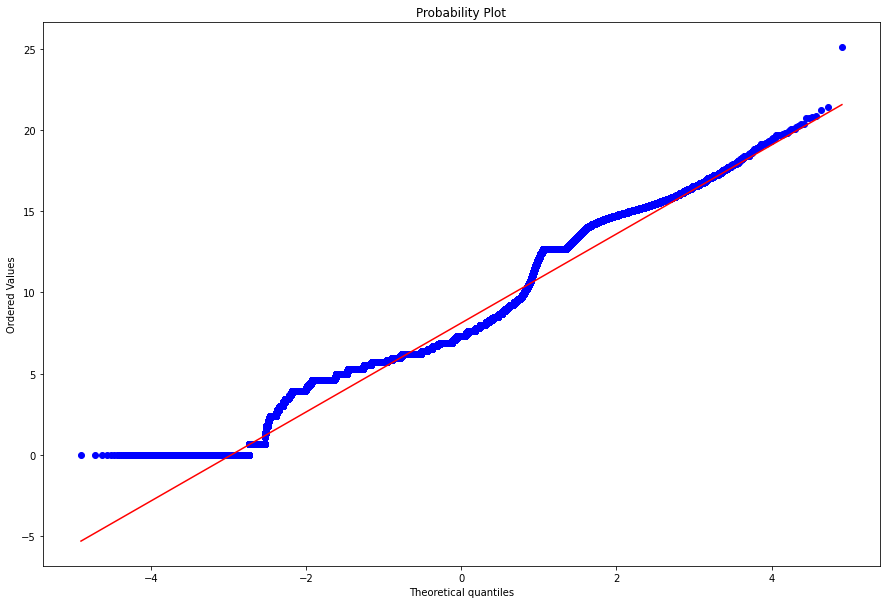

In [7]:
plt.figure(figsize=(15, 10))
stats.probplot(tr_df['price'], plot = plt)
plt.show()

### Translating the Region, city, category, parent category name, param_1,param_2,param_3 features 

* First of all, Translate all the categorical features that are there in Russian Language to English to get a better understanding about the data.

### Region

In [ ]:
tr_df['region'].value_counts()

Краснодарский край         141416
Свердловская область        94475
Ростовская область          89995
Татарстан                   81284
Челябинская область         78339
Нижегородская область       73643
Самарская область           73407
Башкортостан                68291
Пермский край               62704
Новосибирская область       62486
Красноярский край           53442
Саратовская область         49645
Волгоградская область       48998
Кемеровская область         44635
Воронежская область         44116
Иркутская область           44030
Омская область              42939
Алтайский край              41520
Ставропольский край         39187
Тюменская область           35411
Ярославская область         32814
Калининградская область     32756
Оренбургская область        29303
Белгородская область        28868
Ханты-Мансийский АО         28709
Удмуртия                    28537
Владимирская область        26741
Тульская область            25733
Name: region, dtype: int64

### City

In [ ]:
tr_df['city'].value_counts()

Краснодар          63638
Екатеринбург       63602
Новосибирск        56929
Ростов-на-Дону     52323
Нижний Новгород    52010
                   ...  
Бешпагир               1
Нижняя Пойма           1
Быстрогорский          1
Сява                   1
Ломинцевский           1
Name: city, Length: 1733, dtype: int64

### Category Name

In [ ]:
tr_df['category_name'].value_counts()

Одежда, обувь, аксессуары       282753
Детская одежда и обувь          270359
Товары для детей и игрушки       99747
Квартиры                         83670
Телефоны                         65944
Мебель и интерьер                65035
Предложение услуг                64385
Автомобили                       62494
Ремонт и строительство           56201
Бытовая техника                  33705
Товары для компьютера            29565
Дома, дачи, коттеджи             29244
Красота и здоровье               29198
Аудио и видео                    27036
Спорт и отдых                    24881
Коллекционирование               24346
Оборудование для бизнеса         16047
Земельные участки                16038
Часы и украшения                 15566
Книги и журналы                  11819
Собаки                           11612
Игры, приставки и программы      11167
Другие животные                  11040
Велосипеды                       10638
Ноутбуки                         10297
Кошки                    

### Parent Category Name

In [ ]:
tr_df['parent_category_name'].value_counts()

Личные вещи            697623
Для дома и дачи        178823
Бытовая электроника    173008
Недвижимость           153190
Хобби и отдых           86011
Транспорт               79839
Услуги                  64385
Животные                52470
Для бизнеса             18075
Name: parent_category_name, dtype: int64

### Optional Parameter 1

In [ ]:
tr_df['param_1'].value_counts()

Женская одежда    226289
Для девочек       151979
Для мальчиков     117772
Продам            113764
С пробегом         61024
                   ...  
Уральский рекс         1
SkyLink                1
Лхаса Апсо             1
Ла-перм лаперм         1
Бриар                  1
Name: param_1, Length: 371, dtype: int64

### Optional Parameter 2

In [ ]:
tr_df['param_2'].value_counts()

Обувь             150450
Верхняя одежда    141860
Платья и юбки      69483
Другое             36284
Трикотаж           31684
                   ...  
SMA                    1
Landwind               1
Asia                   1
Buick                  1
Changan                1
Name: param_2, Length: 271, dtype: int64

### Optional Parameter 3

In [ ]:
tr_df['param_3'].value_counts()

Вторичка                50615
42–44 (S)               47915
44–46 (M)               35854
86-92 см (1-2 года)     29139
98-104 см (2-4 года)    25774
                        ...  
Prince                      1
S4                          1
Египет                      1
Tunland                     1
TLX                         1
Name: param_3, Length: 1219, dtype: int64

### Translating Region

In [ ]:
translator = Translator(to_lang = 'en')  # initalize the Translator object
df_region = tr_df['region'].value_counts().rename_axis('Regions').reset_index(name='counts')
print (df_region)

                    Regions  counts
0        Краснодарский край  141416
1      Свердловская область   94475
2        Ростовская область   89995
3                 Татарстан   81284
4       Челябинская область   78339
5     Нижегородская область   73643
6         Самарская область   73407
7              Башкортостан   68291
8             Пермский край   62704
9     Новосибирская область   62486
10        Красноярский край   53442
11      Саратовская область   49645
12    Волгоградская область   48998
13      Кемеровская область   44635
14      Воронежская область   44116
15        Иркутская область   44030
16           Омская область   42939
17           Алтайский край   41520
18      Ставропольский край   39187
19        Тюменская область   35411
20      Ярославская область   32814
21  Калининградская область   32756
22     Оренбургская область   29303
23     Белгородская область   28868
24      Ханты-Мансийский АО   28709
25                 Удмуртия   28537
26     Владимирская область 

In [ ]:
df_region.columns

Index(['Regions', 'counts'], dtype='object')

In [ ]:
translator= Translator(from_lang="Russian",to_lang="English")

In [ ]:
l=list(df_region['Regions'].values)
tl=[]
for i in l:
  translations = translator.translate(i)
  tl.append(translations)

In [ ]:
tl

['Krasnodar Region',
 'Sverdlovsk region',
 'Rostov Region',
 'Tatarstan',
 'Chelyabinsk Region',
 'Nizhny Novgorod Region',
 'Samara Region',
 'Bashkortostan',
 'Perm Region',
 'Novosibirsk region',
 'Krasnodar Region',
 'Saratov Region',
 'Volgograd Region',
 'Kemerovo Region',
 'Voronezh Region',
 'Irkutsk Region',
 'Omsk region',
 'Altai Territory',
 'Stavropol region',
 'Tyumen region',
 'Yaroslavl Region',
 'Kaliningrad region',
 'Orenburg Region',
 'Belgorod Region',
 'Khanty-Mansi AO',
 'Udmurtia',
 'Vladimir Region',
 'Tula Region']

In [ ]:
df_region['Translated Regions']=tl
df_region

Regions  counts      Translated Regions
0        Краснодарский край  141416        Krasnodar Region
1      Свердловская область   94475       Sverdlovsk region
2        Ростовская область   89995           Rostov Region
3                 Татарстан   81284               Tatarstan
4       Челябинская область   78339      Chelyabinsk Region
5     Нижегородская область   73643  Nizhny Novgorod Region
6         Самарская область   73407           Samara Region
7              Башкортостан   68291           Bashkortostan
8             Пермский край   62704             Perm Region
9     Новосибирская область   62486      Novosibirsk region
10        Красноярский край   53442        Krasnodar Region
11      Саратовская область   49645          Saratov Region
12    Волгоградская область   48998        Volgograd Region
13      Кемеровская область   44635         Kemerovo Region
14      Воронежская область   44116         Voronezh Region
15        Иркутская область   44030          Irkutsk Region
16           Омская область   42939             Omsk region
17           Алтайский край   41520         Altai Territory
18      Ставропольский край   39187        Stavropol region
19        Тюменская область   35411           Tyumen region
20      Ярославская область   32814        Yaroslavl Region
21  Калининградская область   32756      Kaliningrad region
22     Оренбургская область   29303         Orenburg Region
23     Белгородская область   28868         Belgorod Region
24      Ханты-Мансийский АО   28709         Khanty-Mansi AO
25                 Удмуртия   28537                Udmurtia
26     Владимирская область   26741         Vladimir Region
27         Тульская область   25733             Tula Region

### Translating City

In [ ]:
df_city = tr_df['city'].value_counts().rename_axis('City').reset_index(name='counts')
translator= Translator(from_lang="Russian",to_lang="English")
# Taking a subset of this dataframe now
df_city=df_city.head(50)
l=list(df_city['City'].values)
tl=[]
for i in l:
  translations = translator.translate(i)
  tl.append(translations)

df_city['Translated City']=tl
df_city.head(50)

City  counts     Translated City
0          Краснодар   63638           Krasnodar
1       Екатеринбург   63602        Ekaterinburg
2        Новосибирск   56929         Novosibirsk
3     Ростов-на-Дону   52323       Rostov-on-Don
4    Нижний Новгород   52010     Nizhny Novgorod
5          Челябинск   48380         Chelyabinsk
6              Пермь   46720         The Permian
7             Казань   46663               Kazan
8             Самара   41875              Samara
9               Омск   41412                Omsk
10               Уфа   41355                 Ufa
11        Красноярск   37932         Krasnoyarsk
12           Воронеж   36404            Voronezh
13         Волгоград   33463           Volgograd
14           Саратов   31977             Saratov
15            Тюмень   30451              Tyumen
16       Калининград   28490         Kaliningrad
17           Барнаул   27460   Barnaul&#10;&#10;
18         Ярославль   25098           Yaroslavl
19           Иркутск   24659             Irkutsk
20          Оренбург   22561            Orenburg
21              Сочи   22289               Sochi
22            Ижевск   21972             Izhevsk
23          Тольятти   20831           Togliatti
24          Кемерово   18216            Kemerovo
25          Белгород   17747            Belgorod
26              Тула   16136                Tula
27        Ставрополь   16135           Stavropol
28  Набережные Челны   15395  Naberezhnye Chelny
29       Новокузнецк   13769        Novokuznetsk
30          Владимир   13377            Vladimir
31            Сургут   11684              Surgut
32      Магнитогорск   11562        Magnitogorsk
33      Нижний Тагил    9213        Nizhny Tagil
34      Новороссийск    8601        Novorossiysk
35          Таганрог    8591            Taganrog
36       Стерлитамак    7490         Sterlitamak
37          Волжский    7364            Volzhsky
38         Дзержинск    7164          Dzerzhinsk
39           Энгельс    6950              Engels
40             Бийск    6313               Biysk
41           Ангарск    6192             Angarsk
42             Анапа    5789               Anapa
43            Братск    5704              Bratsk
44     Нижневартовск    5353      Nizhnevartovsk
45         Пятигорск    5127          Pyatigorsk
46      Старый Оскол    5033         Stary Oskol
47        Нижнекамск    4951         Nizhnekamsk
48          Балаково    4914            Balakovo
49             Шахты    4729               Mines

### Translate Category Name

In [ ]:
df_cat = tr_df['category_name'].value_counts().rename_axis('Category').reset_index(name='counts')
# Taking a subset of this dataframe now
l=list(df_cat['Category'].values)
tl=[]
for i in l:
  translations = translator.translate(i)
  tl.append(translations)

df_cat['Translated Category']=tl
df_cat.head(50)

Category  counts  \
0      Одежда, обувь, аксессуары  282753   
1         Детская одежда и обувь  270359   
2     Товары для детей и игрушки   99747   
3                       Квартиры   83670   
4                       Телефоны   65944   
5              Мебель и интерьер   65035   
6              Предложение услуг   64385   
7                     Автомобили   62494   
8         Ремонт и строительство   56201   
9                Бытовая техника   33705   
10         Товары для компьютера   29565   
11          Дома, дачи, коттеджи   29244   
12            Красота и здоровье   29198   
13                 Аудио и видео   27036   
14                 Спорт и отдых   24881   
15            Коллекционирование   24346   
16      Оборудование для бизнеса   16047   
17             Земельные участки   16038   
18              Часы и украшения   15566   
19               Книги и журналы   11819   
20                        Собаки   11612   
21   Игры, приставки и программы   11167   
22               Другие животные   11040   
23                    Велосипеды   10638   
24                      Ноутбуки   10297   
25                         Кошки    9951   
26       Грузовики и спецтехника    9394   
27     Посуда и товары для кухни    9076   
28                      Растения    9025   
29  Планшеты и электронные книги    8624   
30           Товары для животных    8580   
31                       Комнаты    8512   
32                   Фототехника    8345   
33     Коммерческая недвижимость    8305   
34          Гаражи и машиноместа    7304   
35       Музыкальные инструменты    6695   
36       Оргтехника и расходники    6580   
37                         Птицы    6447   
38              Продукты питания    5781   
39       Мотоциклы и мототехника    5771   
40         Настольные компьютеры    5450   
41                      Аквариум    4840   
42               Охота и рыбалка    4524   
43          Билеты и путешествия    3108   
44              Водный транспорт    2180   
45                Готовый бизнес    2028   
46       Недвижимость за рубежом     117   

                          Translated Category  
0          Clothes, footwear, and accessories  
1            Children's clothing and footwear  
2              Products for children and toys  
3                                  Apartments  
4                                      Phones  
5                     Furniture and interiors  
6                       Proposal for Services  
7                                 Automobiles  
8         Construction, repair and renovation  
9                                  Appliances  
10                          Computer products  
11               Houses, villas, and cottages  
12                          Health and Beauty  
13                            Audio and video  
14          Спорт и отдых (Leisure and sport)  
15                                 Collection  
16                     Equipment for business  
17                                 Land plots  
18                        Watches and Jewelry  
19                         Magazines and book  
20                                       Dogs  
21              Games, consoles, and programs  
22                              Other animals  
23                                   Bicycles  
24                                    Laptops  
25                                    Females  
26                Trucks and special vehicles  
27            Dishes and products for kitchen  
28                                     Plants  
29                        Tablets and e-books  
30        Товары для животных (Pets supplies)  
31                                      Rooms  
32                      Photography equipment  
33                        Commercial property  
34                 Garages and parking spaces  
35                        Musical Instruments  
36           Office equipment and consumables  
37                                    Poultry  
38                              Food pr

### Translate Parent Category Name

In [ ]:
df_pcat = tr_df['parent_category_name'].value_counts().rename_axis('Parent Category').reset_index(name='counts')
# Taking a subset of this dataframe now
l=list(df_pcat['Parent Category'].values)
tl=[]
for i in l:
  translations = translator.translate(i)
  tl.append(translations)

df_pcat['Translated Parent Category']=tl
df_pcat.head(50)

Parent Category  counts   Translated Parent Category
0          Личные вещи  697623               Personal items
1      Для дома и дачи  178823  For home, villas and garden
2  Бытовая электроника  173008             Home electronics
3         Недвижимость  153190                  Real estate
4        Хобби и отдых   86011          Hobbies and leisure
5            Транспорт   79839                    Transport
6               Услуги   64385                     Services
7             Животные   52470                      Animals
8          Для бизнеса   18075                 For business

### Translate Parameter 1

In [ ]:
df_p1 = tr_df['param_1'].value_counts().rename_axis('Param 1').reset_index(name='counts')
# Taking a subset of this dataframe now
df_p1 = df_p1.head(50)
l=list(df_p1['Param 1'].values)
tl=[]
for i in l:
  translations = translator.translate(i)
  tl.append(translations)

df_p1['Translated Param 1']=tl
df_p1.head(21)

Param 1  counts              Translated Param 1
0             Женская одежда  226289                 Women's clothes
1                Для девочек  151979                       For girls
2              Для мальчиков  117772                        For boys
3                     Продам  113764                        For Sale
4                 С пробегом   61024                         Mileage
5                 Аксессуары   38568                      Accesories
6             Мужская одежда   35716                  Men's Clothing
7                     Другое   27874                           Other
8                    Игрушки   26442                            Toys
9            Детские коляски   26248       Baby pushchairs/strollers
10                      Сдам   23535                        For rent
11     Ремонт, строительство   21444         Repair and construction
12            Стройматериалы   20197          Construction materials
13                    iPhone   18381                          iPhone
14  Кровати, диваны и кресла   17419      Beds, sofas, and armchairs
15               Инструменты   15904                           Tools
16                 Для кухни   15721                     For kitchen
17             Комплектующие   15085            Packaging components
18            Детская мебель   14251  Nursery Decoration & Furniture
19            Шкафы и комоды   11417          Wardrobes and dressers
20      Приборы и аксессуары   11200         Devices and accessories

### Translate Parameter 2

In [ ]:
df_p2 = tr_df['param_2'].value_counts().rename_axis('Param 2').reset_index(name='counts')
# Taking a subset of this dataframe now
df_p2 = df_p2.head(50)
l=list(df_p2['Param 2'].values)
tl=[]
for i in l:
  translations = translator.translate(i)
  tl.append(translations)

df_p2['Translated Param 2']=tl
df_p2.head(21)

Param 2  counts                Translated Param 2
0                            Обувь  150450                             Shoes
1                   Верхняя одежда  141860                         Outerwear
2                    Платья и юбки   69483                Dresses and skirts
3                           Другое   36284                             Other
4                         Трикотаж   31684                          Triotage
5                            Брюки   25807                             Pants
6                                1   23426                                 1
7                                2   22921                                 2
8               На длительный срок   22096                   For a long time
9                              Дом   20550                             House
10                      ВАЗ (LADA)   19442                        VAZ (LADA)
11              Комбинезоны и боди   17633                 Overalls and body
12                               3   13006                                 3
13                 Поселений (ИЖС)   10611                Settlements (IZHS)
14               Пиджаки и костюмы   10329              Jackets and costumes
15                Рубашки и блузки   10079                Shirts and blouses
16           Шапки, варежки, шарфы    9389            Hats, mittens, scarves
17                          Джинсы    9141                             Jeans
18                           Гараж    6954                            Garage
19                  Чехлы и плёнки    6886                  Covers and films
20  Строительство домов, коттеджей    6635  Construction of houses, cottages

### Translate Parameter 3

In [ ]:
df_p3 = tr_df['param_3'].value_counts().rename_axis('Param 3').reset_index(name='counts')
# Taking a subset of this dataframe now
df_p3 = df_p3.head(50)
l=list(df_p3['Param 3'].values)
tl=[]
for i in l:
  translations = translator.translate(i)
  tl.append(translations)

df_p3['Translated Param 3']=tl
df_p3.head(21)

Param 3  counts       Translated Param 3
0                Вторичка   50615                   Second
1               42–44 (S)   47915                42–44 (S)
2               44–46 (M)   35854                44–46 (M)
3     86-92 см (1-2 года)   29139     86-92 cm (1-2 years)
4    98-104 см (2-4 года)   25774    98-104 cm (2-4 years)
5     74-80 см (7-12 мес)   23708   74-80 cm (7-12 months)
6             Без размера   19494                     Size
7              40–42 (XS)   19041               40–42 (XS)
8    110-116 см (4-6 лет)   18896   110-116 cm (4-6 years)
9               46–48 (L)   18783                46–48 (L)
10     62-68 см (2-6 мес)   16728    62-68 cm (2-6 months)
11                     38   14884                       38
12                     37   14373                       37
13   122-128 см (6-8 лет)   13457   122-128 cm (6-8 years)
14                     36   11599                       36
15            Новостройка   11000             New building
16                      1   10138                        1
17                     39   10057                       39
18             48–50 (XL)   10020               48–50 (XL)
19  134-140 см (8-10 лет)    9688  134-140 cm (8-10 years)
20             > 50 (XXL)    9508               > 50 (XXL)

### Finding Top 10 Famous Regions

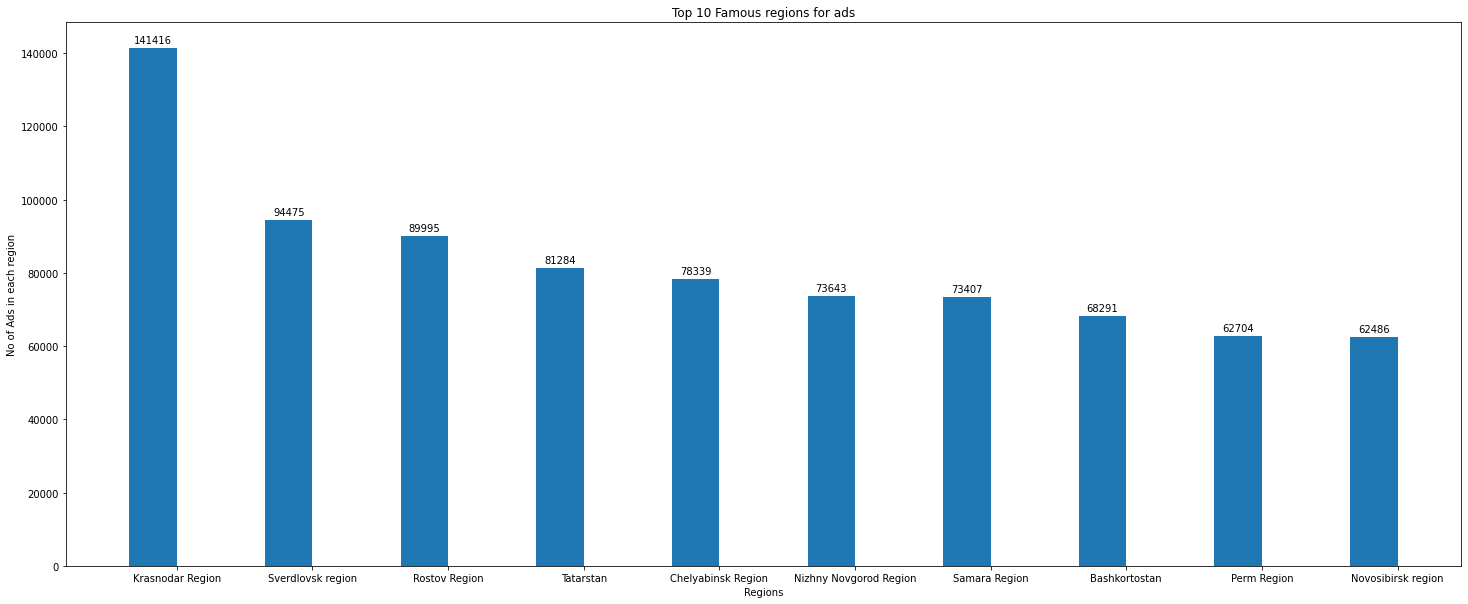

In [ ]:
top_10=df_region.head(10)
regions = list(top_10['Translated Regions'].values)
counts = list(top_10['counts'].values)
fig, ax = plt.subplots(figsize=(25,10))

x=np.arange(len(regions))
ax.set_ylabel('No of Ads in each region')
ax.set_xlabel('Regions')
ax.set_title('Top 10 Famous regions for ads')
ax.set_xticks(x)
ax.set_xticklabels(regions)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='region')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')




### Finding Top 10 Famous Cities

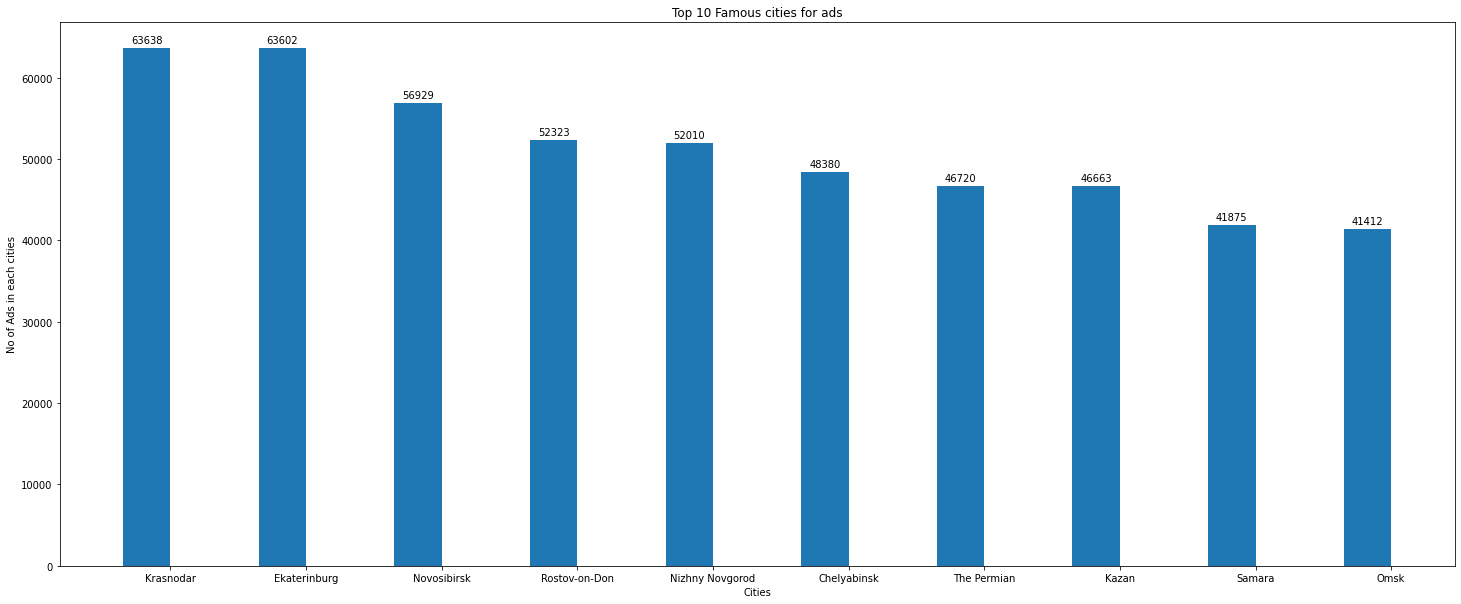

In [ ]:
top_10=df_city.head(10)
cities = list(top_10['Translated City'].values)
counts = list(top_10['counts'].values)
fig, ax = plt.subplots(figsize=(25,10))

x=np.arange(len(cities))
ax.set_ylabel('No of Ads in each cities')
ax.set_xlabel('Cities')
ax.set_title('Top 10 Famous cities for ads')
ax.set_xticks(x)
ax.set_xticklabels(cities)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='cities')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')




### Top 10 Famous Fine Grain AD Categories

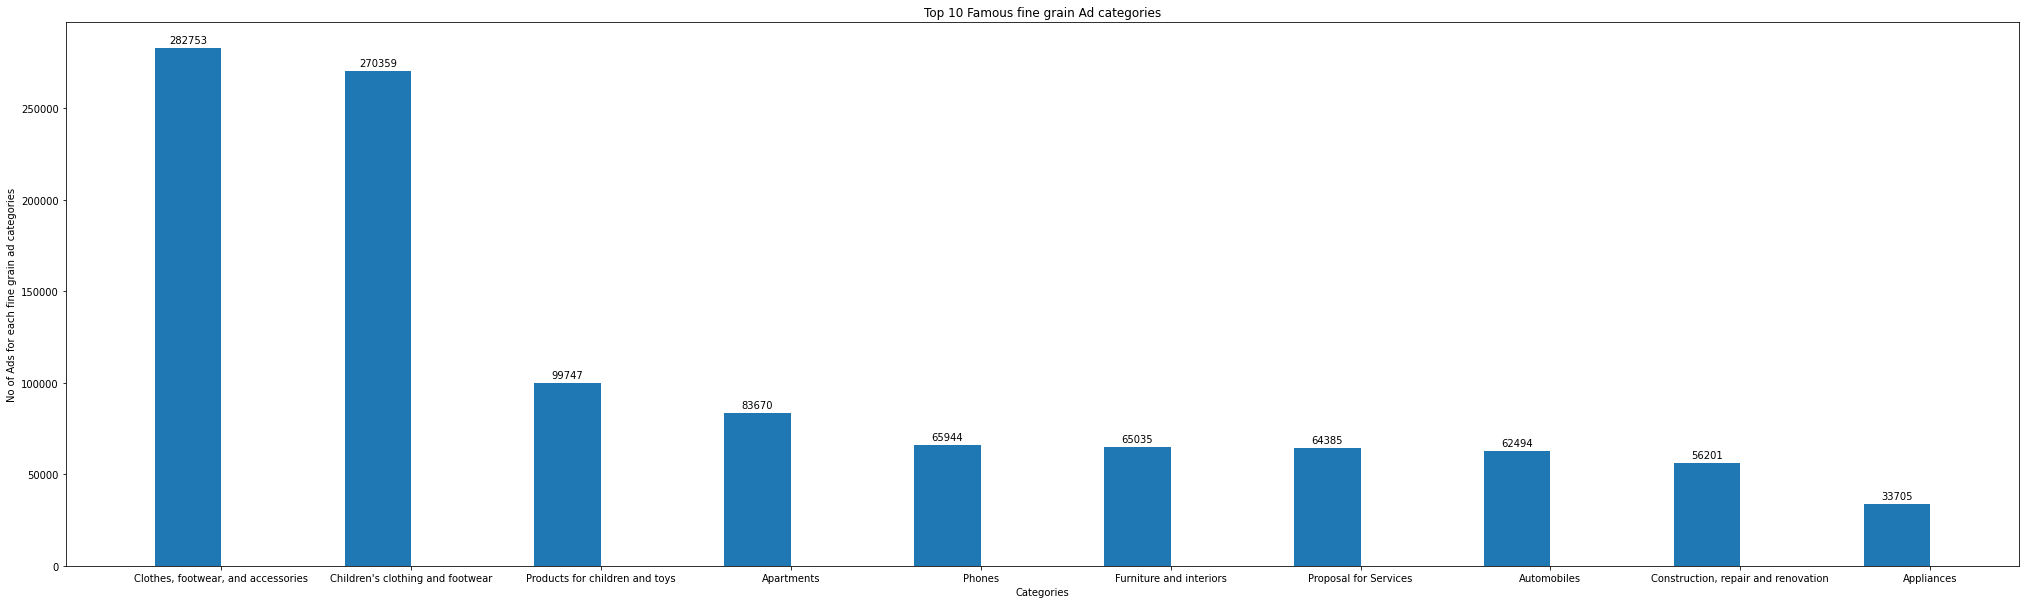

In [ ]:
top_10=df_cat.head(10)
cat = list(top_10['Translated Category'].values)
counts = list(top_10['counts'].values)
fig, ax = plt.subplots(figsize=(35,10))

x=np.arange(len(cat))
ax.set_ylabel('No of Ads for each fine grain ad categories')
ax.set_xlabel('Categories')
ax.set_title('Top 10 Famous fine grain Ad categories')
ax.set_xticks(x)
ax.set_xticklabels(cat)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='ad_category')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')




### Famous Parent AD Categories

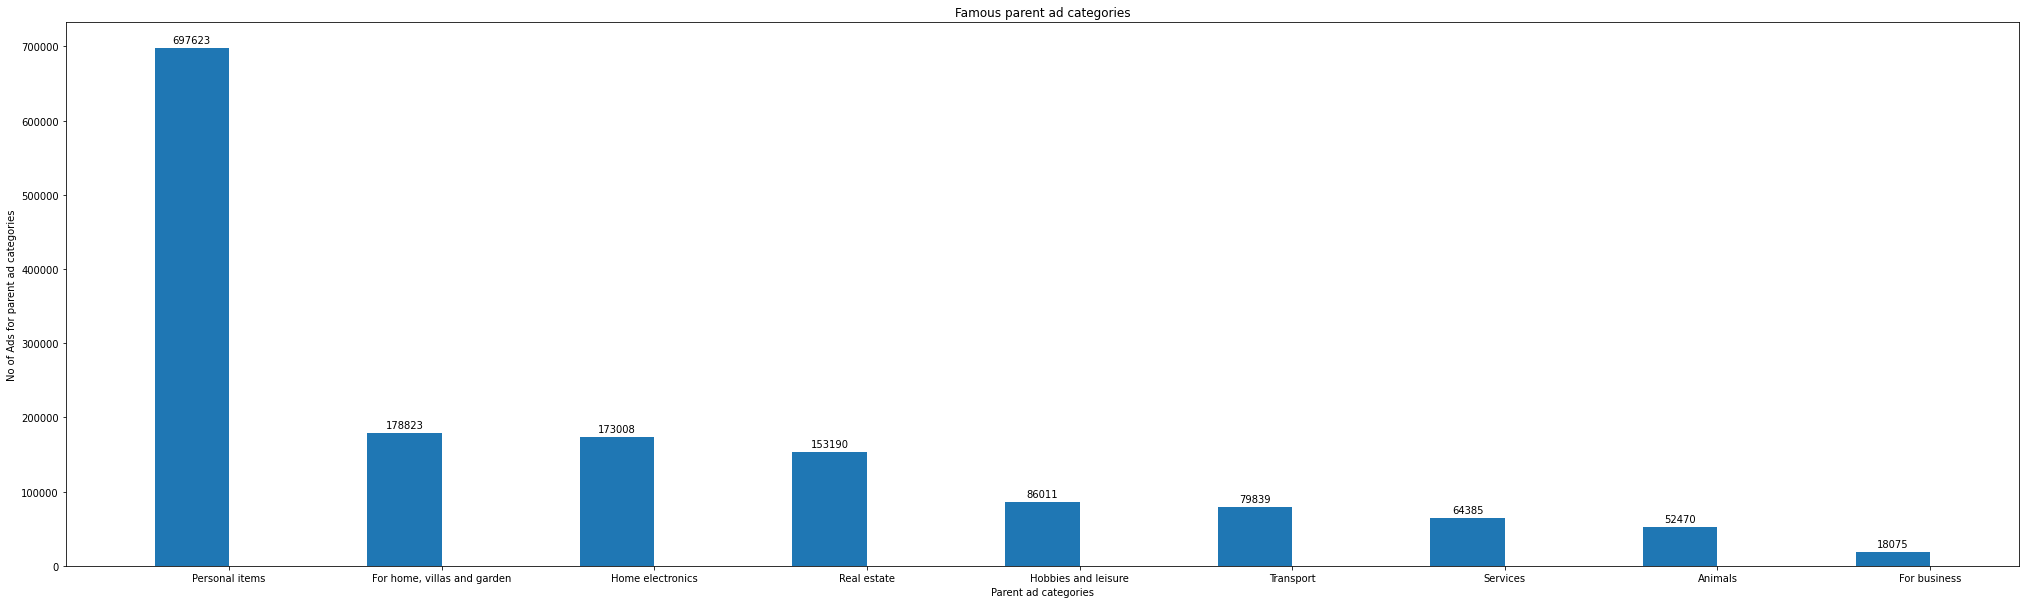

In [ ]:
top_10=df_pcat
pcat = list(top_10['Translated Parent Category'].values)
counts = list(top_10['counts'].values)
fig, ax = plt.subplots(figsize=(35,10))

x=np.arange(len(pcat))
ax.set_ylabel('No of Ads for parent ad categories')
ax.set_xlabel('Parent ad categories')
ax.set_title('Famous parent ad categories')
ax.set_xticks(x)
ax.set_xticklabels(pcat)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='parent_ad')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')




### Famous AD Param 1

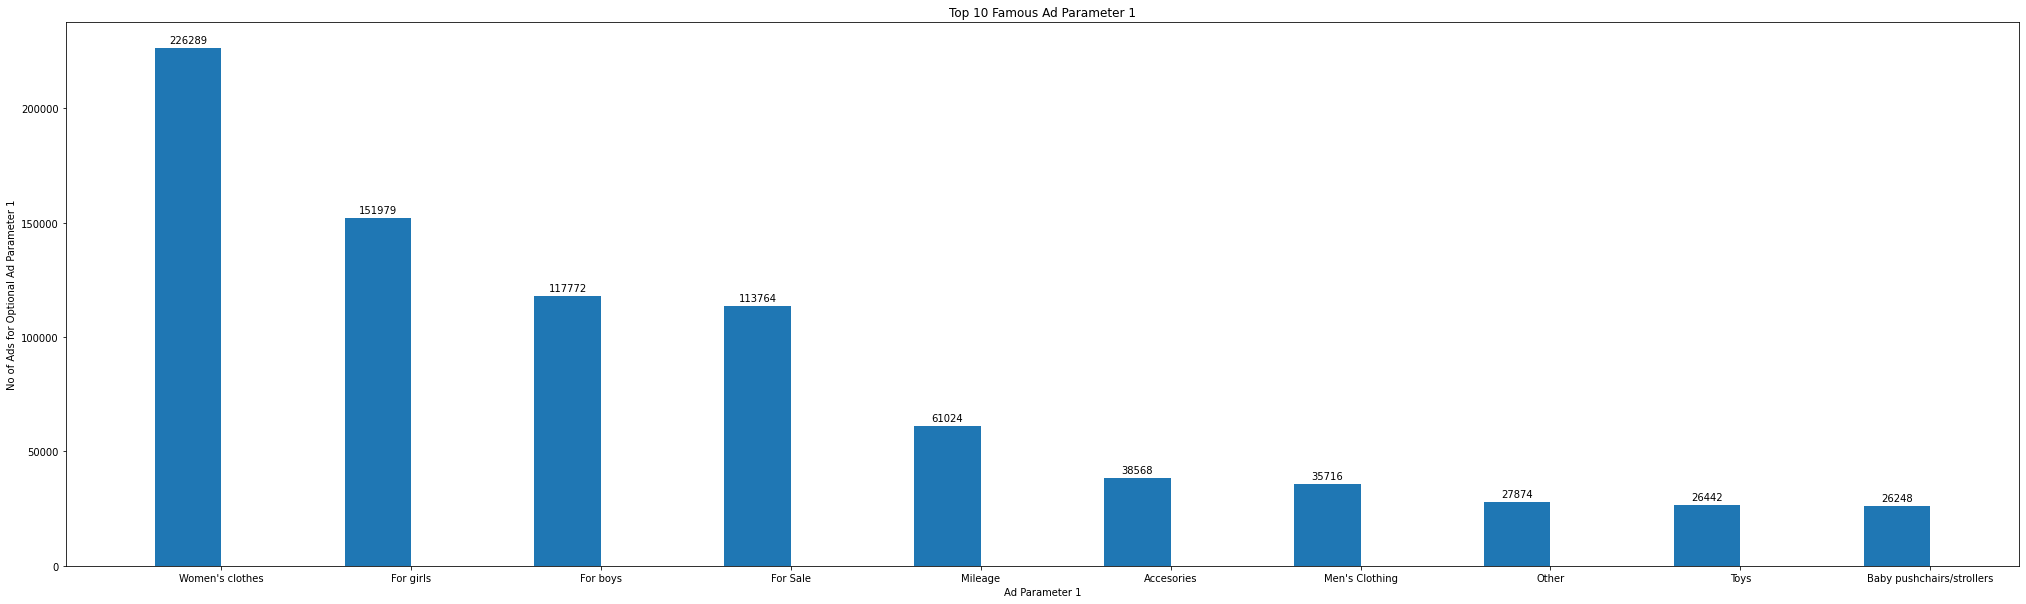

In [ ]:
top_10=df_p1.head(10)
p1 = list(top_10['Translated Param 1'].values)
counts = list(top_10['counts'].values)
fig, ax = plt.subplots(figsize=(35,10))

x=np.arange(len(p1))
ax.set_ylabel('No of Ads for Optional Ad Parameter 1')
ax.set_xlabel('Ad Parameter 1')
ax.set_title('Top 10 Famous Ad Parameter 1')
ax.set_xticks(x)
ax.set_xticklabels(p1)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='param_1')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')



### Famous AD Param 2

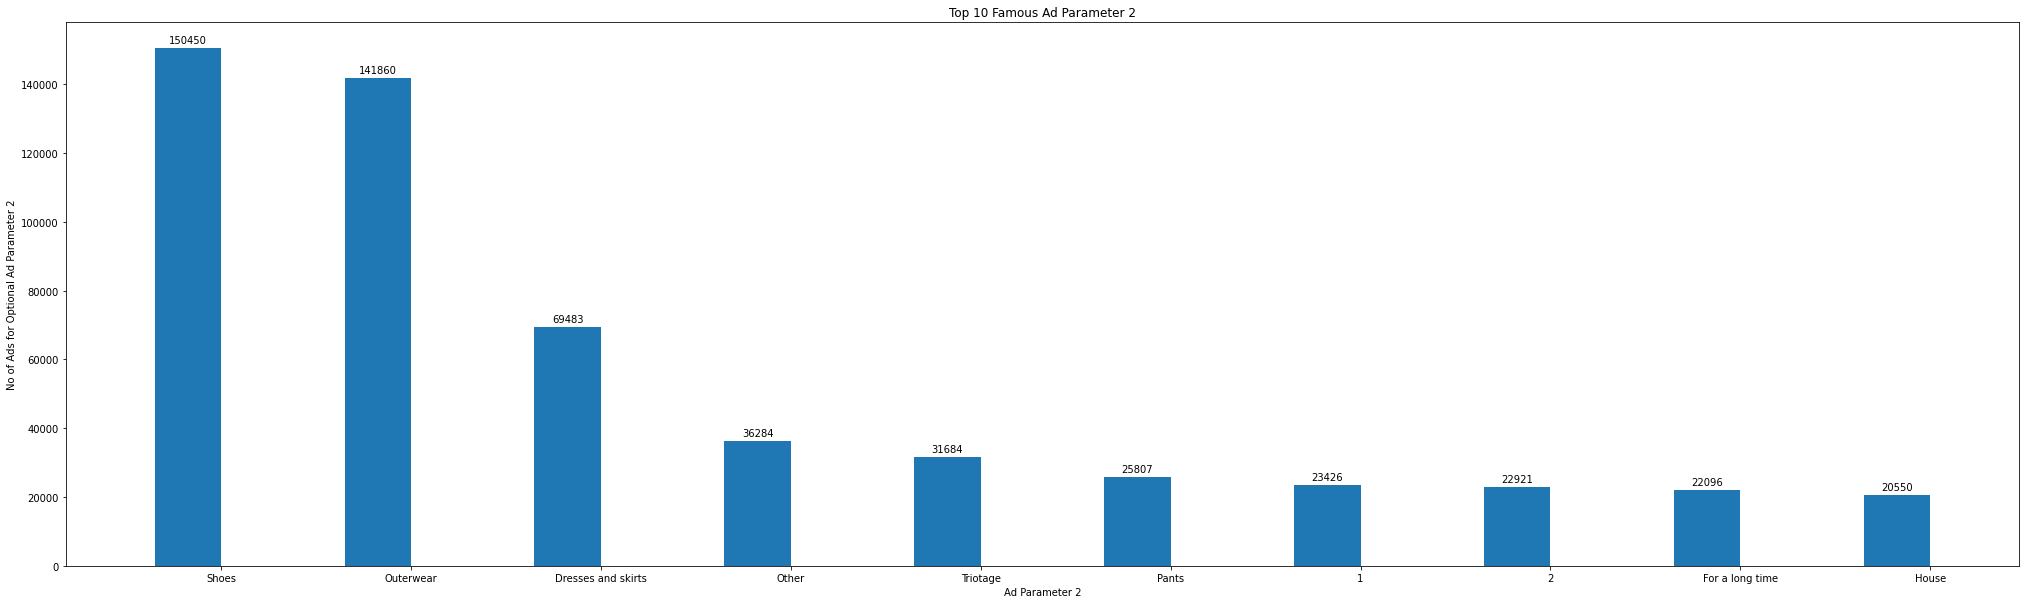

In [ ]:
top_10=df_p2.head(10)
p2 = list(top_10['Translated Param 2'].values)
counts = list(top_10['counts'].values)
fig, ax = plt.subplots(figsize=(35,10))

x=np.arange(len(p2))
ax.set_ylabel('No of Ads for Optional Ad Parameter 2')
ax.set_xlabel('Ad Parameter 2')
ax.set_title('Top 10 Famous Ad Parameter 2')
ax.set_xticks(x)
ax.set_xticklabels(p2)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='param_2')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

### Famous Ad Param 3

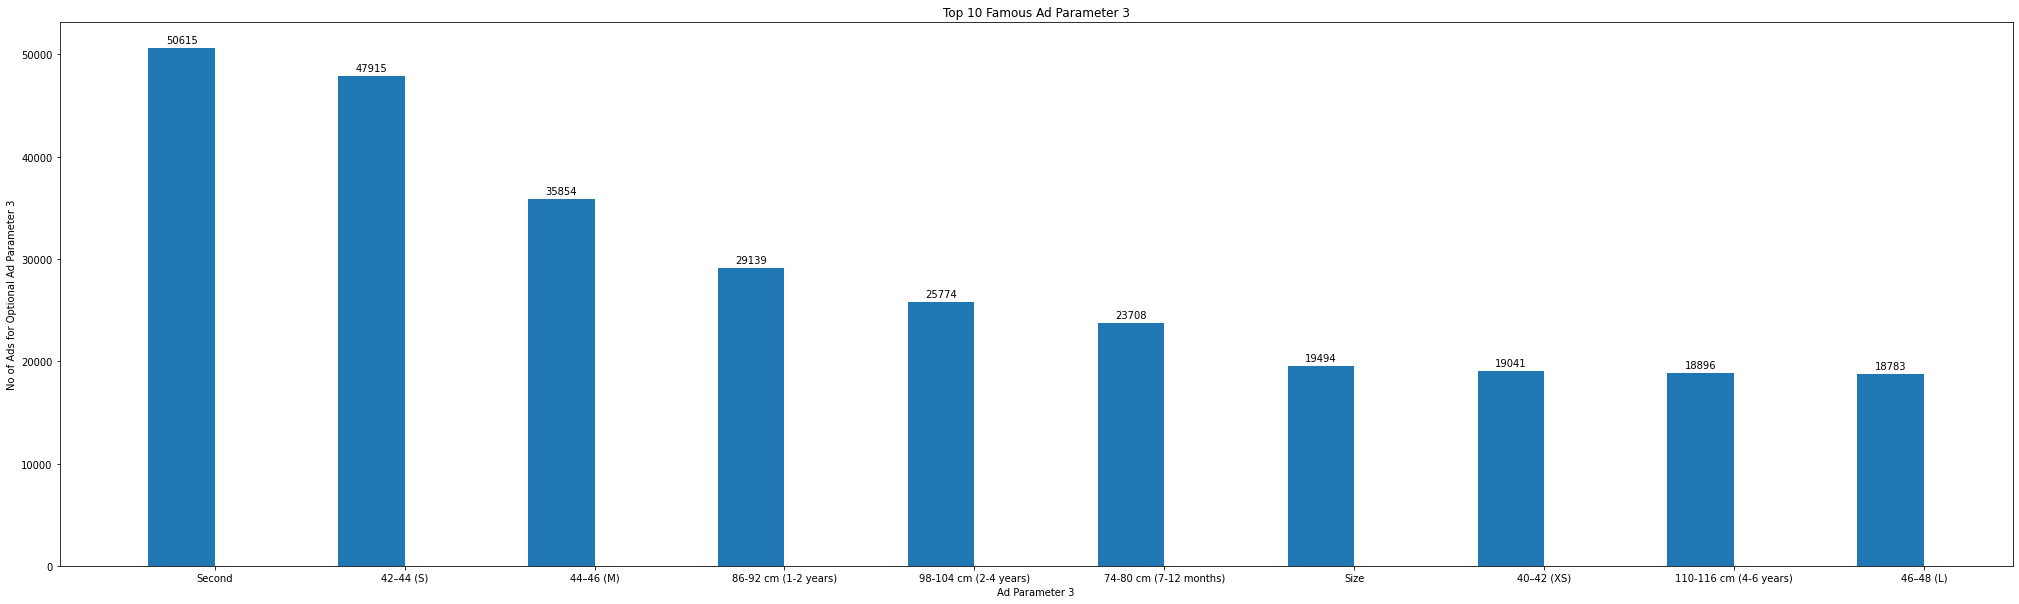

In [ ]:
top_10=df_p3.head(10)
p3 = list(top_10['Translated Param 3'].values)
counts = list(top_10['counts'].values)
fig, ax = plt.subplots(figsize=(35,10))

x=np.arange(len(p3))
ax.set_ylabel('No of Ads for Optional Ad Parameter 3')
ax.set_xlabel('Ad Parameter 3')
ax.set_title('Top 10 Famous Ad Parameter 3')
ax.set_xticks(x)
ax.set_xticklabels(p3)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='param_3')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')



### Histogram of Deal Probability

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


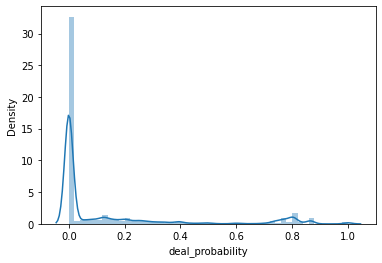

In [ ]:
sns.distplot(tr_df["deal_probability"],kde=True,hist=True)

### Description of Deal Probability

In [ ]:
tr_df['deal_probability'].describe()

count    1.503424e+06
mean     1.391306e-01
std      2.600785e-01
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.508700e-01
max      1.000000e+00
Name: deal_probability, dtype: float64

* Minimum deal probability observed is 0.0
* Average deal Probability is 0.1391306
* Median deal Probability is 0.0
* Maximum deal Probability observed is 1.0

### Binning the deal Probability Feature and Plotting a Pie Chart Based on binned feature

In [ ]:
tr_df['dp_binned'] = np.where(tr_df['deal_probability']>=0.5, 'Yes', 'No')

In [ ]:
tr_df['dp_binned'].value_counts()

No     1321411
Yes     182013
Name: dp_binned, dtype: int64

In [ ]:
yl=len(tr_df[tr_df['dp_binned']=='Yes'])
nl=len(tr_df[tr_df['dp_binned']=='No'])

([<matplotlib.patches.Wedge at 0x7ff10e8f47d0>,
 [Text(1.0213927465072834, 0.4083587361405512, 'Yes'),
  Text(-1.0213927847405833, -0.4083586405108587, 'No')],
 [Text(0.5571233162767, 0.222741128803937, '12%'),
  Text(-0.5571233371312272, -0.22274107664228654, '88%')])

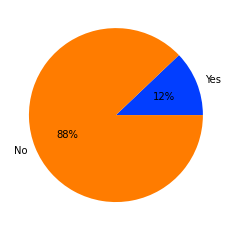

In [ ]:
palette_color = sns.color_palette('bright')
plt.pie([yl,nl], labels=['Yes','No'], colors=palette_color, autopct='%.0f%%')

* Here, deal probability feature is binned based on a condition.
* Deal Probability >= 0.5 belongs to 'Yes'
* Deal Probability < 0.5 belongs to 'No'
* After plotting the pie chart it can be found out that 88 % training data having less than 0.5 deal probabilty. Remaining 12 % having probability more than or equal to 0.5.

### Distribution of AD price feature

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


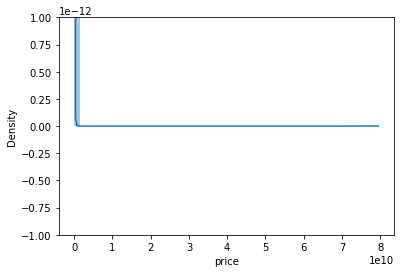

In [ ]:
sns.distplot(tr_df["price"],kde=True,hist=True)

### Description of AD Price feature

In [ ]:
tr_df['price'].describe()

count    1.418062e+06
mean     3.167081e+05
std      6.689154e+07
min      0.000000e+00
25%      5.000000e+02
50%      1.300000e+03
75%      7.000000e+03
max      7.950101e+10
Name: price, dtype: float64

* Minimum Ad Price observed is 0.0
* Average deal Probability is 316708.1
* Median deal Probability is 1300.000
* Maximum deal Probability observed is 79501010000

### Distributions of Ads Based on Region

([<matplotlib.patches.Wedge at 0x7ff10afc1490>,
 [Text(1.0523202574571506, 0.32034680542392896, 'Krasnodar Region'),
  Text(0.7754555199318187, 0.7801722480371067, 'Sverdlovsk region'),
  Text(0.42521019063271376, 1.0144931216041297, 'Rostov Region'),
  Text(0.04287162153944611, 1.099164238895434, 'Tatarstan'),
  Text(-0.31935931756951036, 1.0526203618976486, 'Chelyabinsk Region'),
  Text(-0.6320944562855418, 0.9002536300027263, 'Nizhny Novgorod Region'),
  Text(-0.8747837835275698, 0.6668982921534512, 'Samara Region'),
  Text(-1.0313087722608576, 0.3826254255244973, 'Bashkortostan'),
  Text(-1.0963454540594928, 0.08959154738637387, 'Perm Region'),
  Text(-1.0822156526557147, -0.19700071356968654, 'Novosibirsk region'),
  Text(-1.0033594553431258, -0.4508545257325762, 'Krasnodar Region'),
  Text(-0.8837993255564699, -0.6549036205014667, 'Saratov Region'),
  Text(-0.7310508011411957, -0.8219274457948318, 'Volgograd Region'),
  Text(-0.5573098595072085, -0.9483700335291366, 'Kemerovo Reg

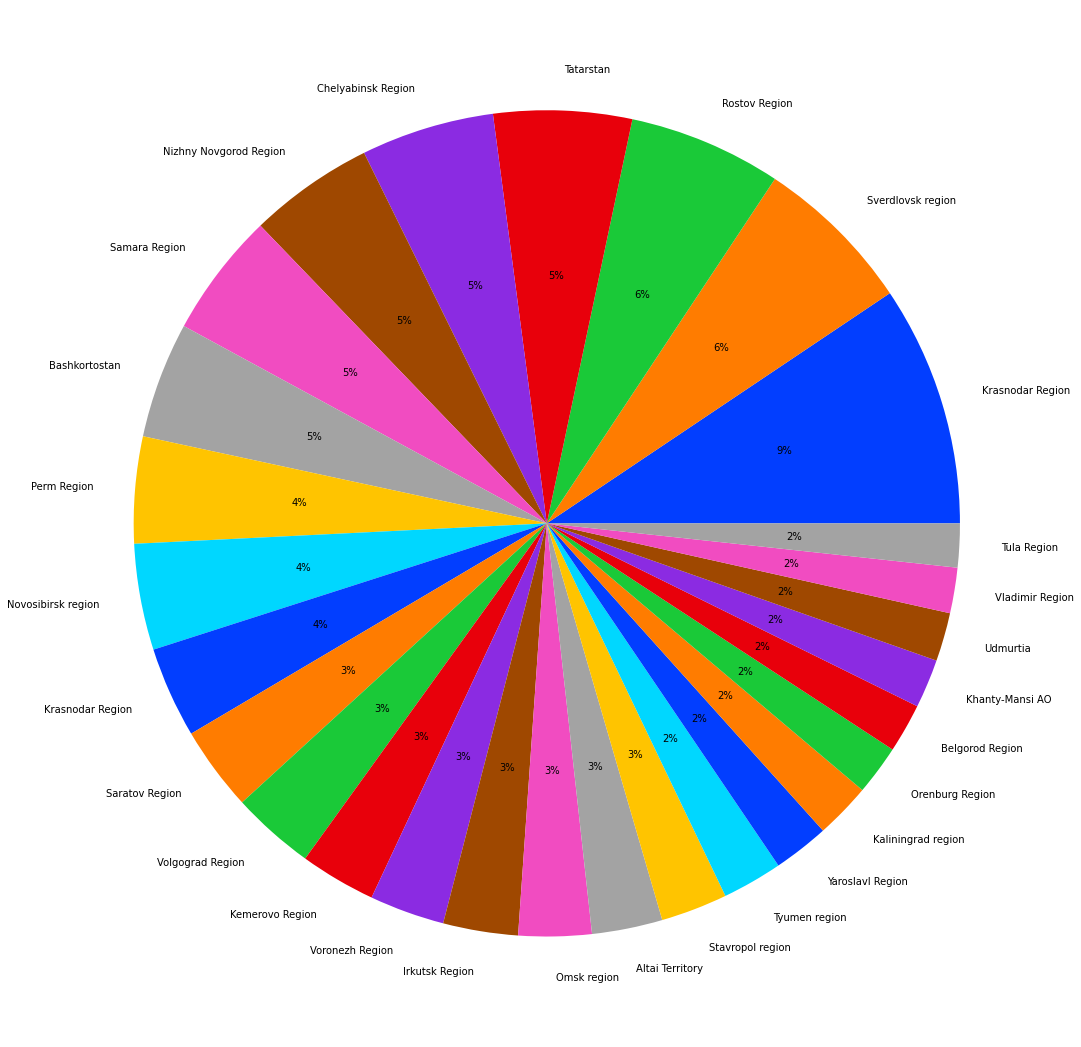

In [ ]:
palette_color = sns.color_palette('bright')
plt.figure(figsize=(20,19))
plt.pie(list(df_region['counts'].values), labels=list(df_region['Translated Regions'].values), colors=palette_color, autopct='%.0f%%')

**Kransnodar, Sverdlovsk, Rostov, Tatarstan, Chelyabinsk are the top 5 regions that have higher distributions of ads.**

### Distribution of Ads Based on Parent Category Name

([<matplotlib.patches.Wedge at 0x7ff10c542950>,
 [Text(0.12406378531640266, 1.0929813251711877, 'Personal items'),
  Text(-1.0880360844785173, -0.16179455761136358, 'For home, villas and garden'),
  Text(-0.6984756571613857, -0.8497833584820137, 'Home electronics'),
  Text(-0.006983125837131766, -1.0999778343010114, 'Real estate'),
  Text(0.5210746172020105, -0.9687524158977765, 'Hobbies and leisure'),
  Text(0.8191488652277272, -0.7341628815161708, 'Transport'),
  Text(1.0001529459123026, -0.4579236669827656, 'Services'),
  Text(1.0811929015748003, -0.2025386619494274, 'Animals'),
  Text(1.0992154767459426, -0.04153716025669758, 'For business')],
 [Text(0.06767115562712872, 0.5961716319115569, '46%'),
  Text(-0.593474227897373, -0.08825157687892557, '12%'),
  Text(-0.38098672208802853, -0.4635181955356438, '12%'),
  Text(-0.0038089777293445993, -0.5999879096187334, '10%'),
  Text(0.2842225184738239, -0.5284104086715143, '6%'),
  Text(0.44680847194239665, -0.4004524808270022, '5%'),
  

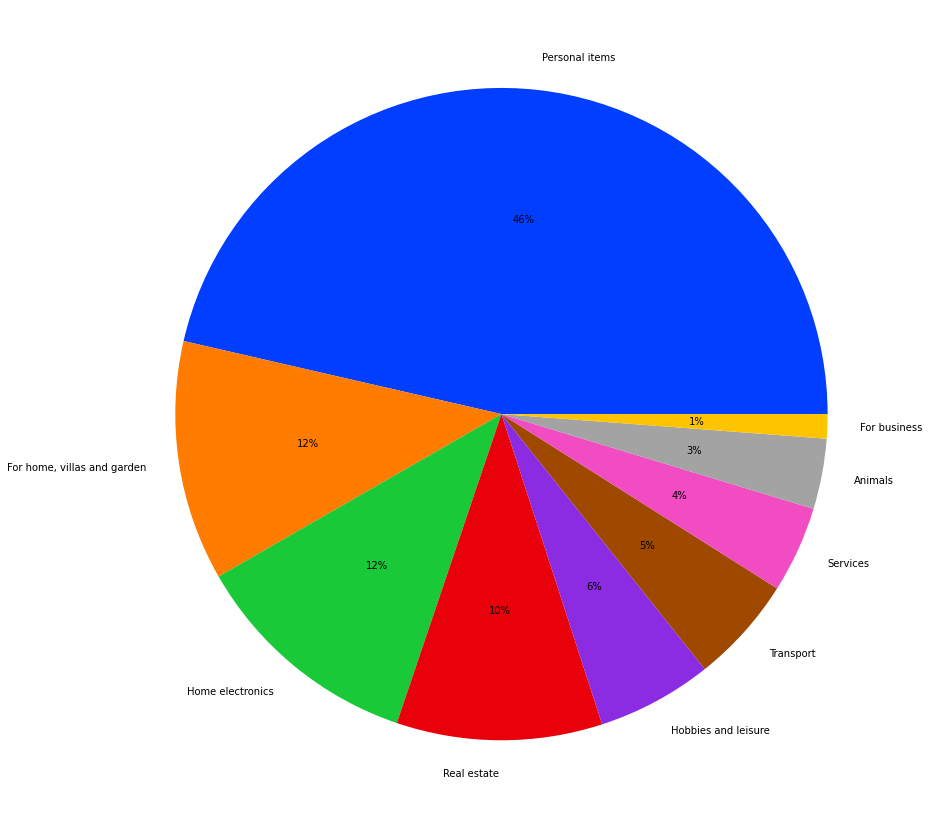

In [ ]:
palette_color = sns.color_palette('bright')
plt.figure(figsize=(15,15))
plt.pie(list(df_pcat['counts'].values), labels=list(df_pcat['Translated Parent Category'].values), colors=palette_color, autopct='%.0f%%')

**Personal items, For home/villas and garden, Home electronics, Real Estate Hobbies and leiseure are the top 5 features that has higher distribution od ads.**

### Distribution of ads based on user types

([<matplotlib.patches.Wedge at 0x7ff10c10a310>,
 [Text(-0.6891254694710159, 0.8573832791268746, 'Private'),
  Text(0.5359153756927937, -0.9606220433115471, 'Company'),
  Text(1.0844856303702044, -0.18409486011440016, 'Shop')],
 [Text(-0.3758866197114632, 0.467663606796477, '72%'),
  Text(0.2923174776506147, -0.5239756599881166, '23%'),
  Text(0.5915376165655659, -0.10041537824421826, '5%')])

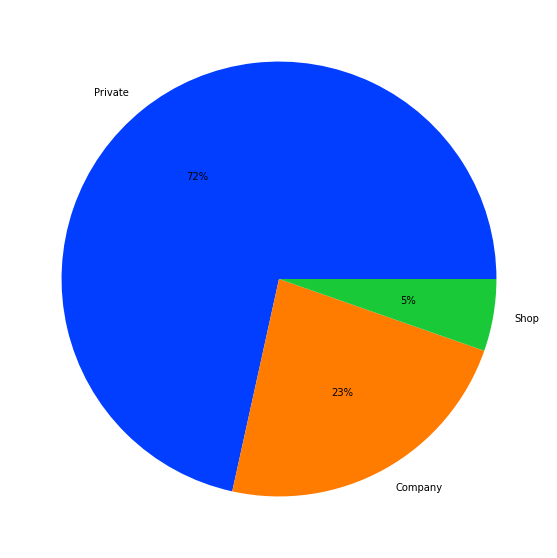

In [ ]:
df_user = tr_df['user_type'].value_counts().rename_axis('User Type').reset_index(name='counts')
palette_color = sns.color_palette('bright')
plt.figure(figsize=(10,10))
plt.pie(list(df_user['counts'].values), labels=list(df_user['User Type'].values), colors=palette_color, autopct='%.0f%%')

**It can be observed that private users have higher distributions of ads i.e. 72% ads**

### Price Vs Deal Probability Feature

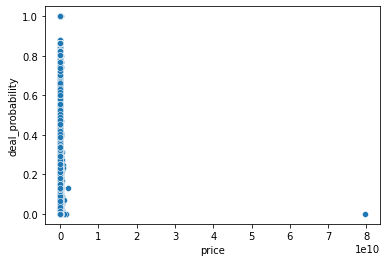

In [ ]:
sns.scatterplot(x='price',y='deal_probability',data=tr_df)

In [ ]:
df_region['Regions'].values

array(['Краснодарский край', 'Свердловская область', 'Ростовская область',
       'Татарстан', 'Челябинская область', 'Нижегородская область',
       'Самарская область', 'Башкортостан', 'Пермский край',
       'Новосибирская область', 'Красноярский край',
       'Саратовская область', 'Волгоградская область',
       'Кемеровская область', 'Воронежская область', 'Иркутская область',
       'Омская область', 'Алтайский край', 'Ставропольский край',
       'Тюменская область', 'Ярославская область',
       'Калининградская область', 'Оренбургская область',
       'Белгородская область', 'Ханты-Мансийский АО', 'Удмуртия',
       'Владимирская область', 'Тульская область'], dtype=object)

In [19]:
parent_category_name_map = {"Личные вещи" : "Personal belongings",
                            "Для дома и дачи" : "For the home and garden",
                            "Бытовая электроника" : "Consumer electronics",
                            "Недвижимость" : "Real estate",
                            "Хобби и отдых" : "Hobbies & leisure",
                            "Транспорт" : "Transport",
                            "Услуги" : "Services",
                            "Животные" : "Animals",
                            "Для бизнеса" : "For business"}

region_map = {"Свердловская область" : "Sverdlovsk oblast",
            "Самарская область" : "Samara oblast",
            "Ростовская область" : "Rostov oblast",
            "Татарстан" : "Tatarstan",
            "Волгоградская область" : "Volgograd oblast",
            "Нижегородская область" : "Nizhny Novgorod oblast",
            "Пермский край" : "Perm Krai",
            "Оренбургская область" : "Orenburg oblast",
            "Ханты-Мансийский АО" : "Khanty-Mansi Autonomous Okrug",
            "Тюменская область" : "Tyumen oblast",
            "Башкортостан" : "Bashkortostan",
            "Краснодарский край" : "Krasnodar Krai",
            "Новосибирская область" : "Novosibirsk oblast",
            "Омская область" : "Omsk oblast",
            "Белгородская область" : "Belgorod oblast",
            "Челябинская область" : "Chelyabinsk oblast",
            "Воронежская область" : "Voronezh oblast",
            "Кемеровская область" : "Kemerovo oblast",
            "Саратовская область" : "Saratov oblast",
            "Владимирская область" : "Vladimir oblast",
            "Калининградская область" : "Kaliningrad oblast",
            "Красноярский край" : "Krasnoyarsk Krai",
            "Ярославская область" : "Yaroslavl oblast",
            "Удмуртия" : "Udmurtia",
            "Алтайский край" : "Altai Krai",
            "Иркутская область" : "Irkutsk oblast",
            "Ставропольский край" : "Stavropol Krai",
            "Тульская область" : "Tula oblast"}


category_map = {"Одежда, обувь, аксессуары":"Clothing, shoes, accessories",
"Детская одежда и обувь":"Children's clothing and shoes",
"Товары для детей и игрушки":"Children's products and toys",
"Квартиры":"Apartments",
"Телефоны":"Phones",
"Мебель и интерьер":"Furniture and interior",
"Предложение услуг":"Offer services",
"Автомобили":"Cars",
"Ремонт и строительство":"Repair and construction",
"Бытовая техника":"Appliances",
"Товары для компьютера":"Products for computer",
"Дома, дачи, коттеджи":"Houses, villas, cottages",
"Красота и здоровье":"Health and beauty",
"Аудио и видео":"Audio and video",
"Спорт и отдых":"Sports and recreation",
"Коллекционирование":"Collecting",
"Оборудование для бизнеса":"Equipment for business",
"Земельные участки":"Land",
"Часы и украшения":"Watches and jewelry",
"Книги и журналы":"Books and magazines",
"Собаки":"Dogs",
"Игры, приставки и программы":"Games, consoles and software",
"Другие животные":"Other animals",
"Велосипеды":"Bikes",
"Ноутбуки":"Laptops",
"Кошки":"Cats",
"Грузовики и спецтехника":"Trucks and buses",
"Посуда и товары для кухни":"Tableware and goods for kitchen",
"Растения":"Plants",
"Планшеты и электронные книги":"Tablets and e-books",
"Товары для животных":"Pet products",
"Комнаты":"Room",
"Фототехника":"Photo",
"Коммерческая недвижимость":"Commercial property",
"Гаражи и машиноместа":"Garages and Parking spaces",
"Музыкальные инструменты":"Musical instruments",
"Оргтехника и расходники":"Office equipment and consumables",
"Птицы":"Birds",
"Продукты питания":"Food",
"Мотоциклы и мототехника":"Motorcycles and bikes",
"Настольные компьютеры":"Desktop computers",
"Аквариум":"Aquarium",
"Охота и рыбалка":"Hunting and fishing",
"Билеты и путешествия":"Tickets and travel",
"Водный транспорт":"Water transport",
"Готовый бизнес":"Ready business",
"Недвижимость за рубежом":"Property abroad"}
tr_df['region_en'] = tr_df['region'].apply(lambda x : region_map[x])
tr_df['parent_category_name_en'] = tr_df['parent_category_name'].apply(lambda x : parent_category_name_map[x])
tr_df['category_name_en'] = tr_df['category_name'].apply(lambda x : category_map[x])

### Deal Probability of regions based on User Type

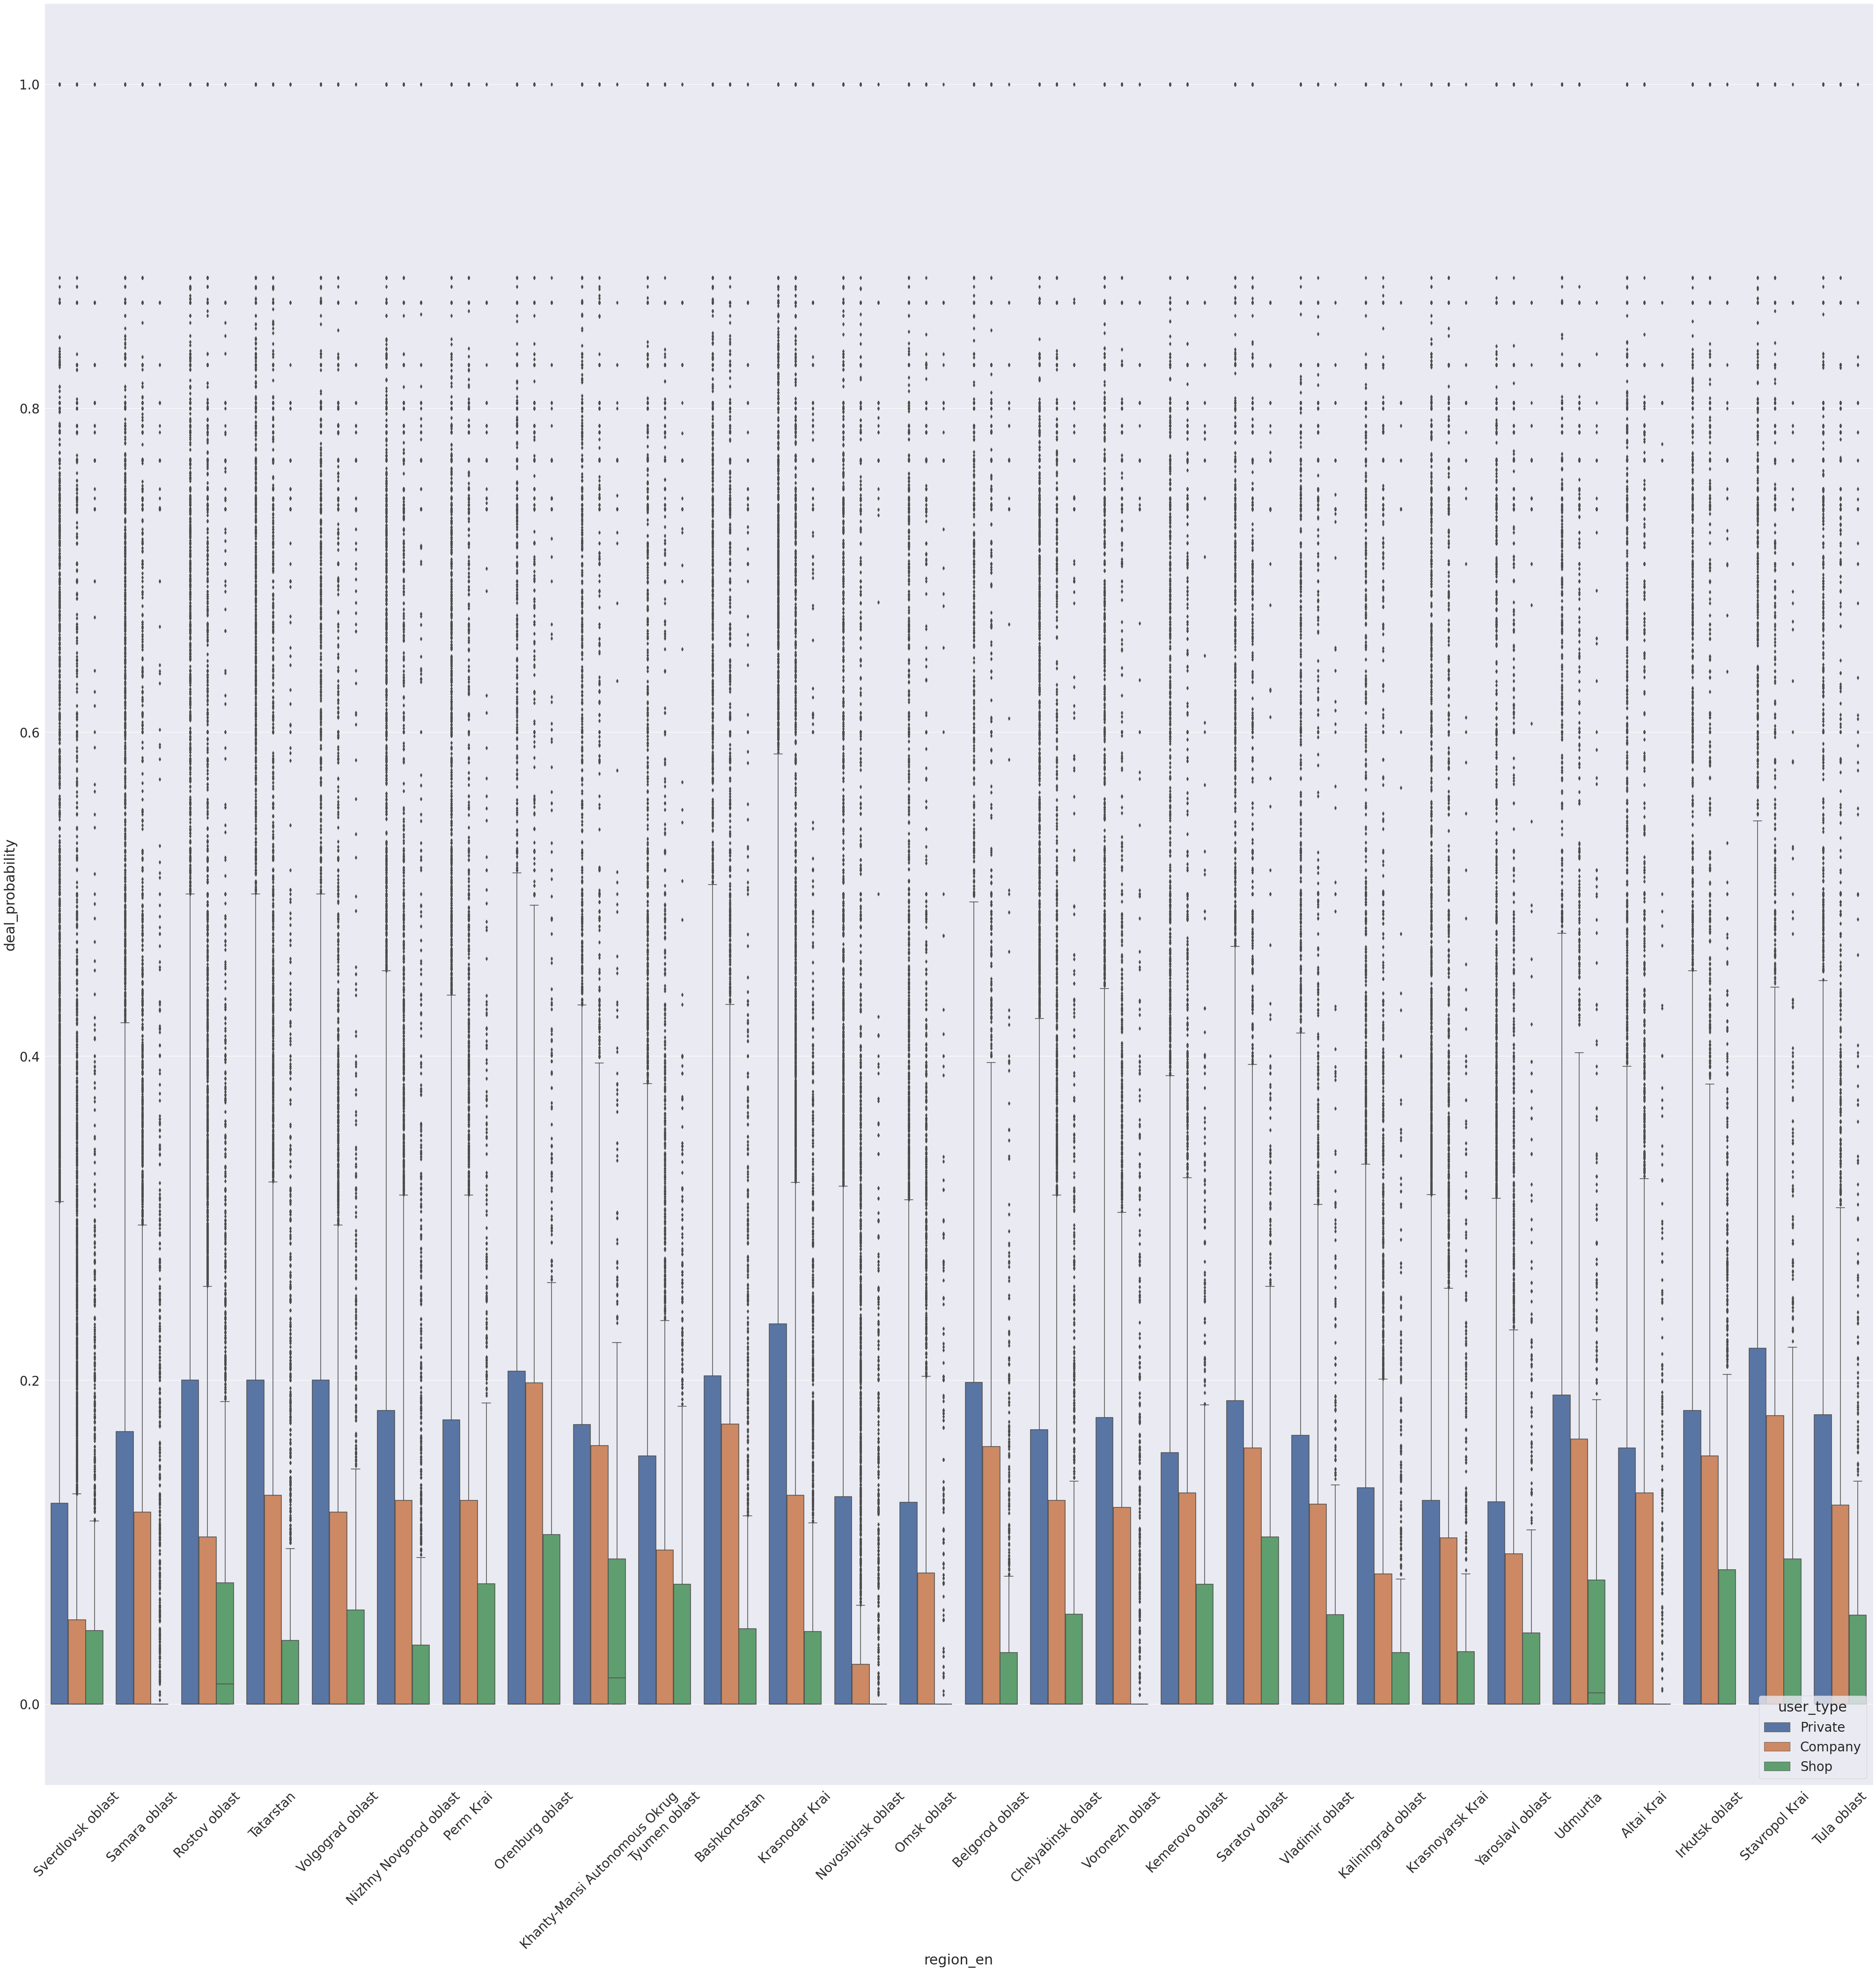

In [ ]:
sns.set(rc={'figure.figsize':(70,70)})
sns.set(font_scale = 2.5)
plt.xticks(rotation=45)
sns.boxplot(x='region_en',y='deal_probability',data=tr_df,hue='user_type')

### Deal Probability of parent ad categories based on User Type

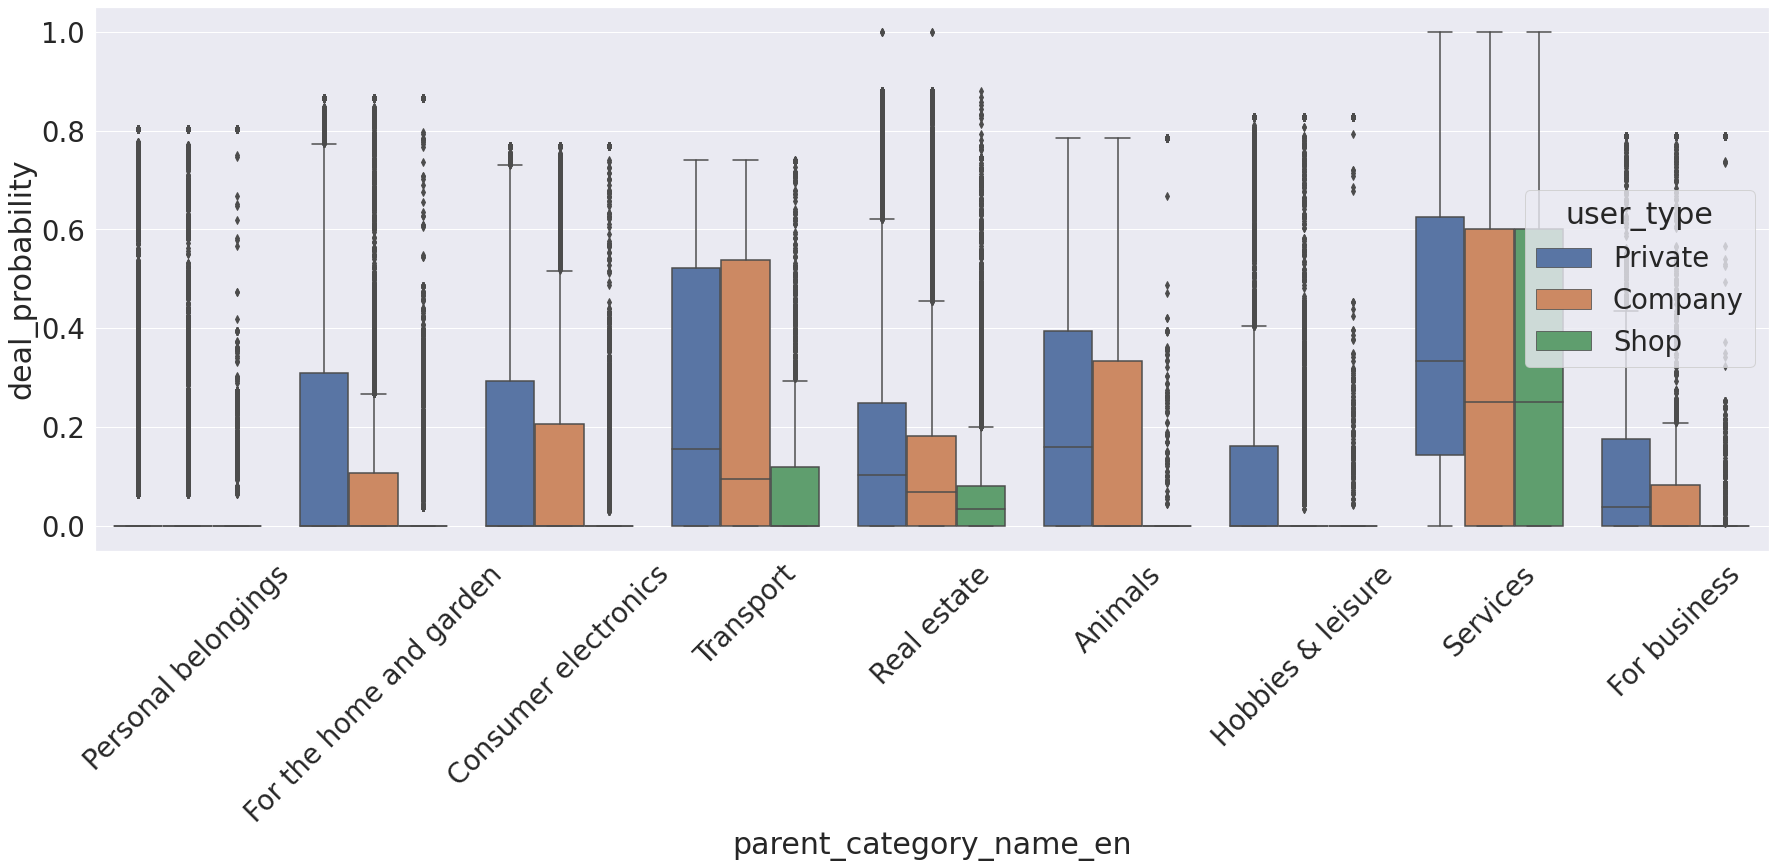

In [ ]:
sns.set(rc={'figure.figsize':(30,10)})
sns.set(font_scale = 2.5)
plt.xticks(rotation=45)
sns.boxplot(x='parent_category_name_en',y='deal_probability',data=tr_df,hue='user_type')

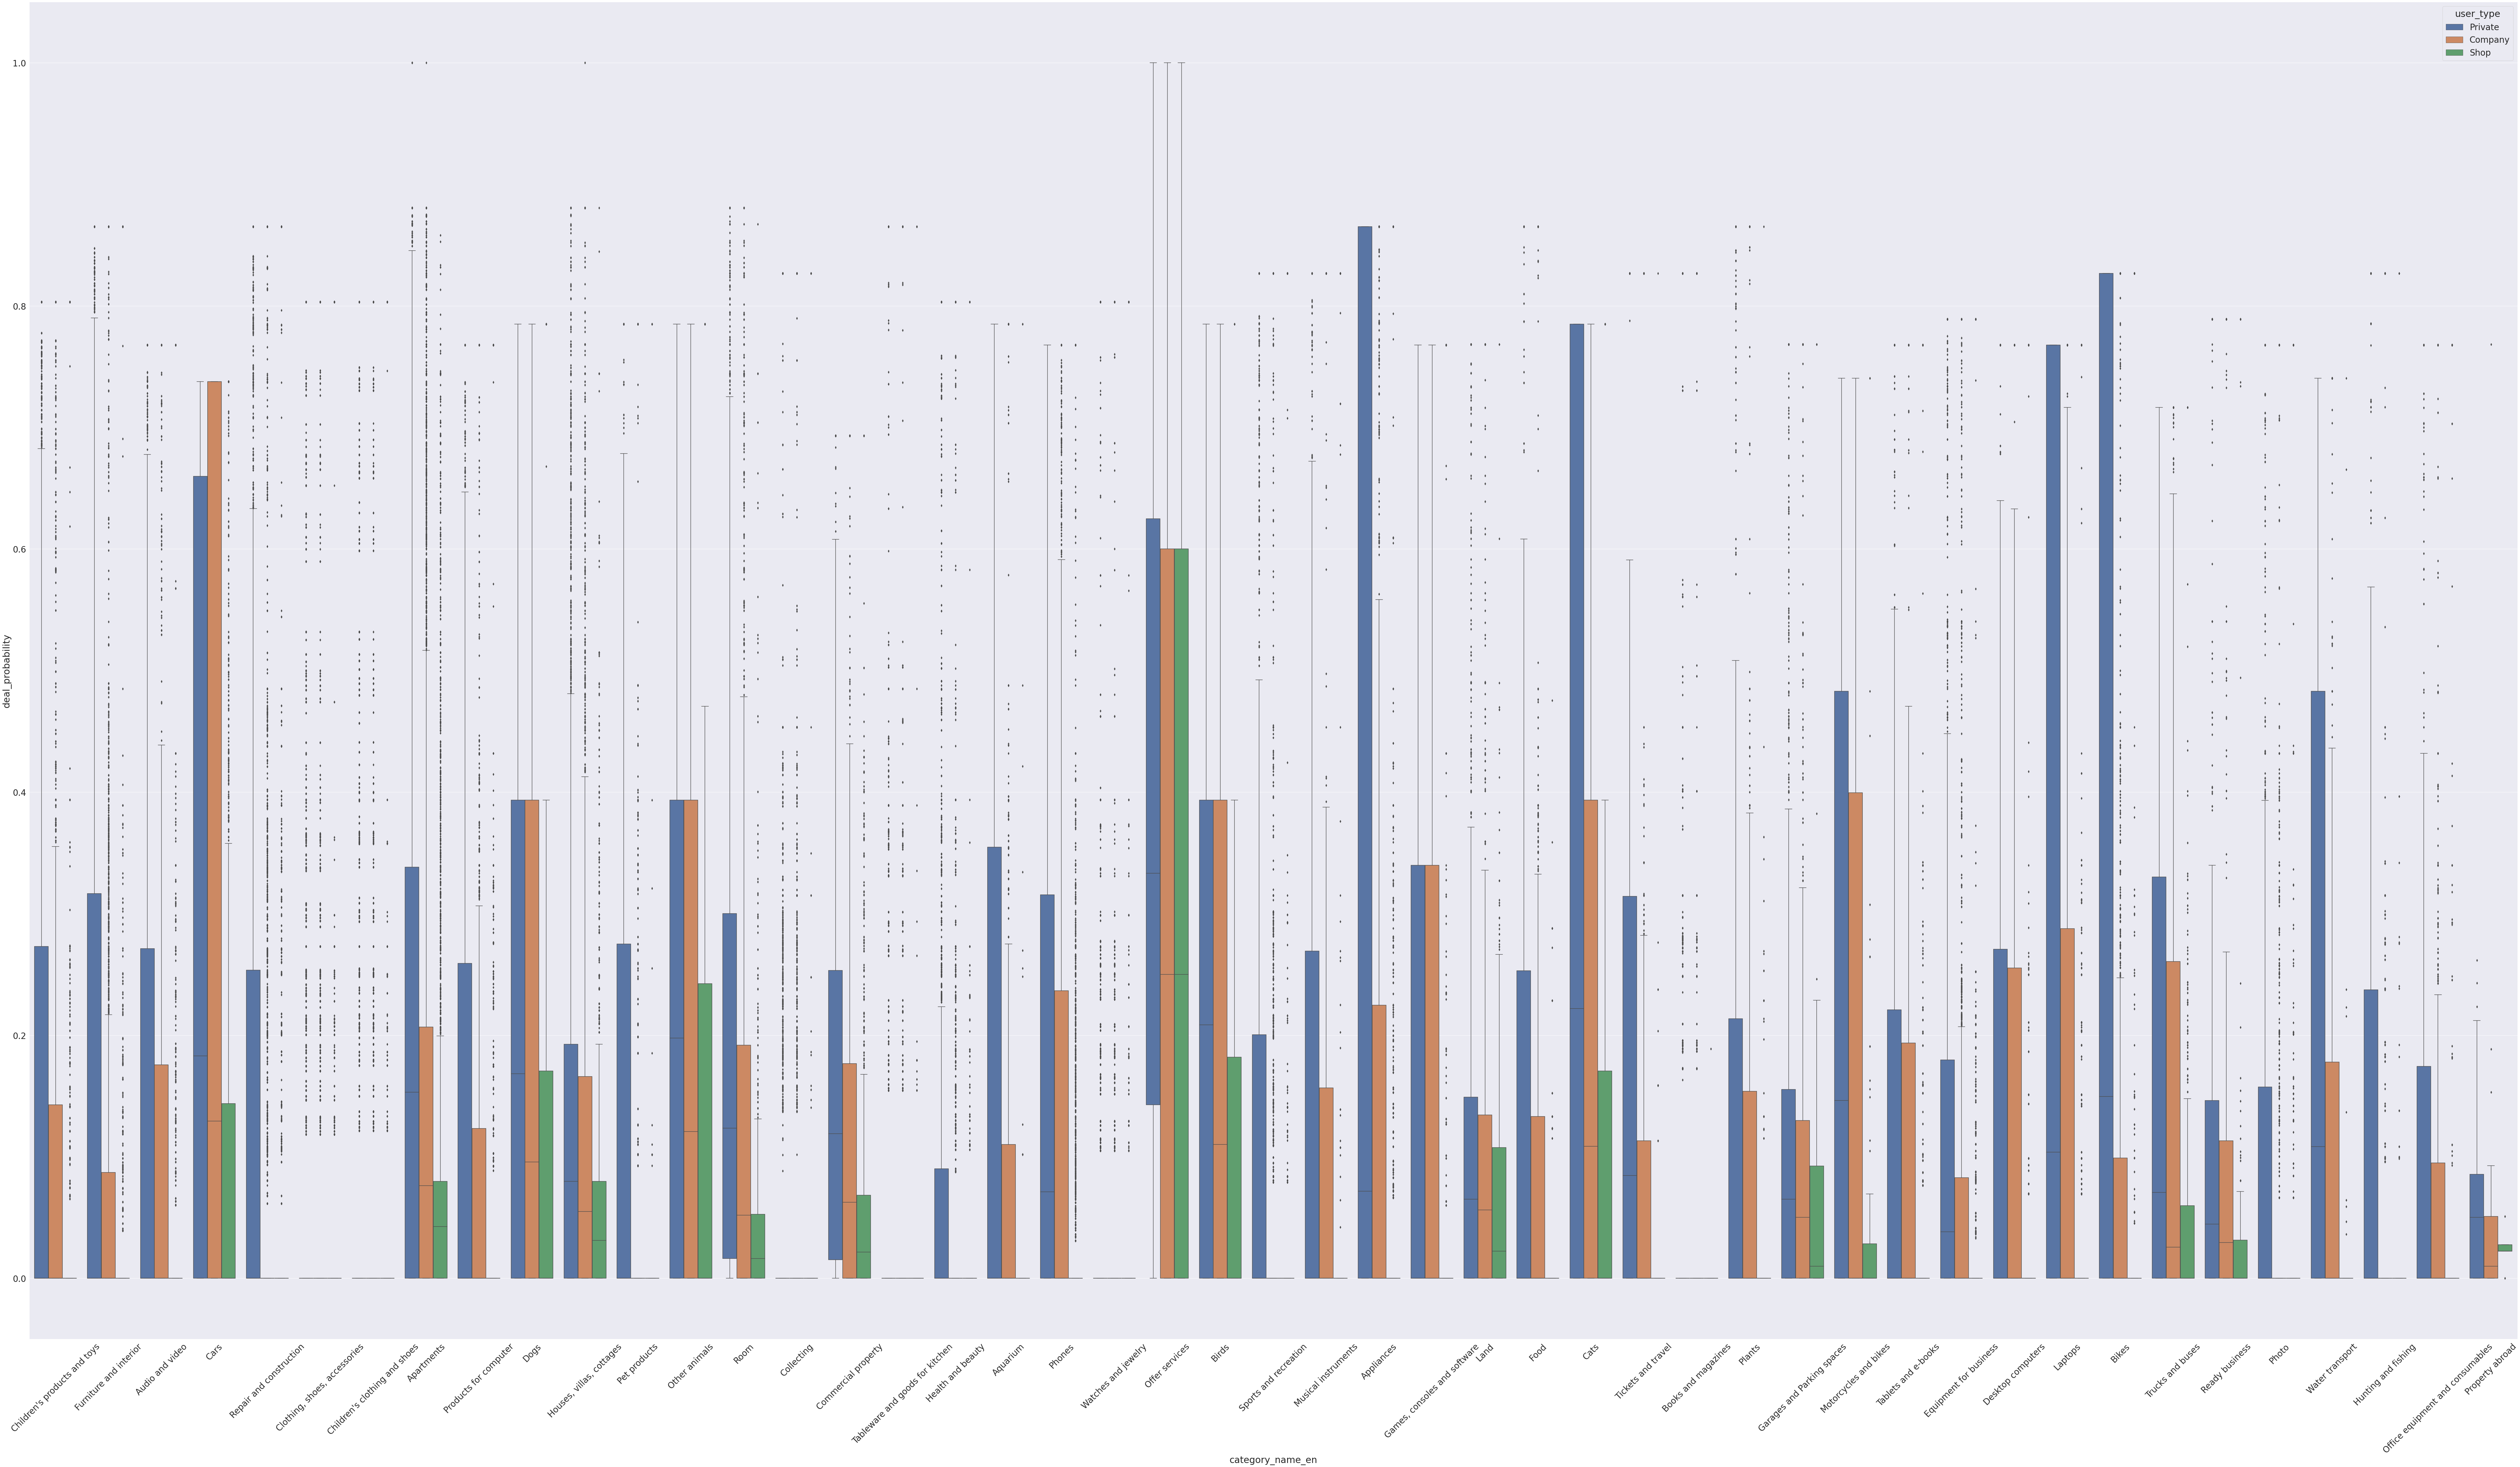

In [ ]:
sns.set(rc={'figure.figsize':(145,80)})
sns.set(font_scale = 2.5)
plt.xticks(rotation=45)
sns.boxplot(x='category_name_en',y='deal_probability',data=tr_df,hue='user_type')

### Creating stacked bar charts to check which kind of user has given most ads based on region

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 <a list of 28 Text major ticklabel objects>)

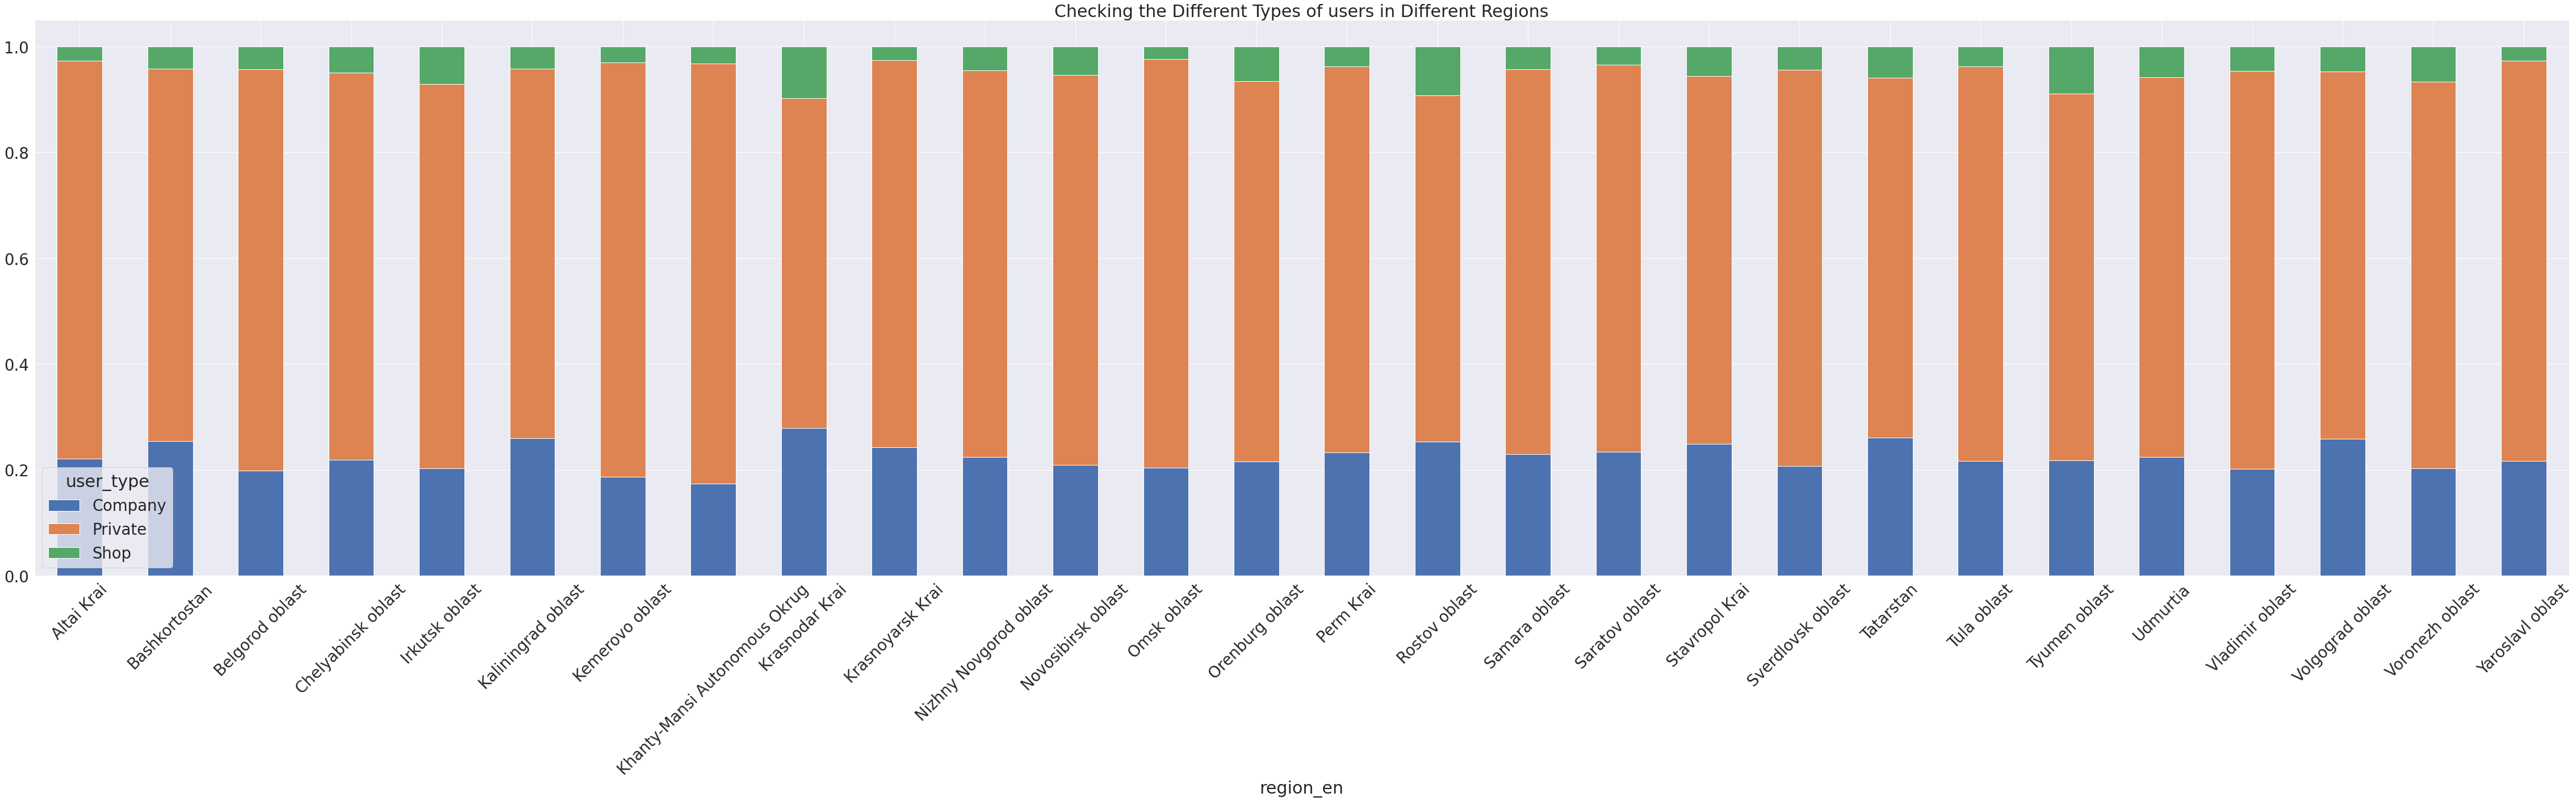

In [ ]:
data = pd.crosstab(tr_df['region_en'], tr_df['user_type'])
data.div(data.sum(1).astype(float), axis = 0).plot.bar(stacked = True, figsize = (80, 18))
plt.title('Checking the Different Types of users in Different Regions')
plt.xticks(rotation = 45)

* After Looking at the stacked bar chart, it can be found out that almost all of the regions have private user type.
* Shops have given lesser amounts of ads in Avito dataset.

### Creating stacked bar charts to check which kind of user has given most ads based on parent ad categories

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 <a list of 9 Text major ticklabel objects>)

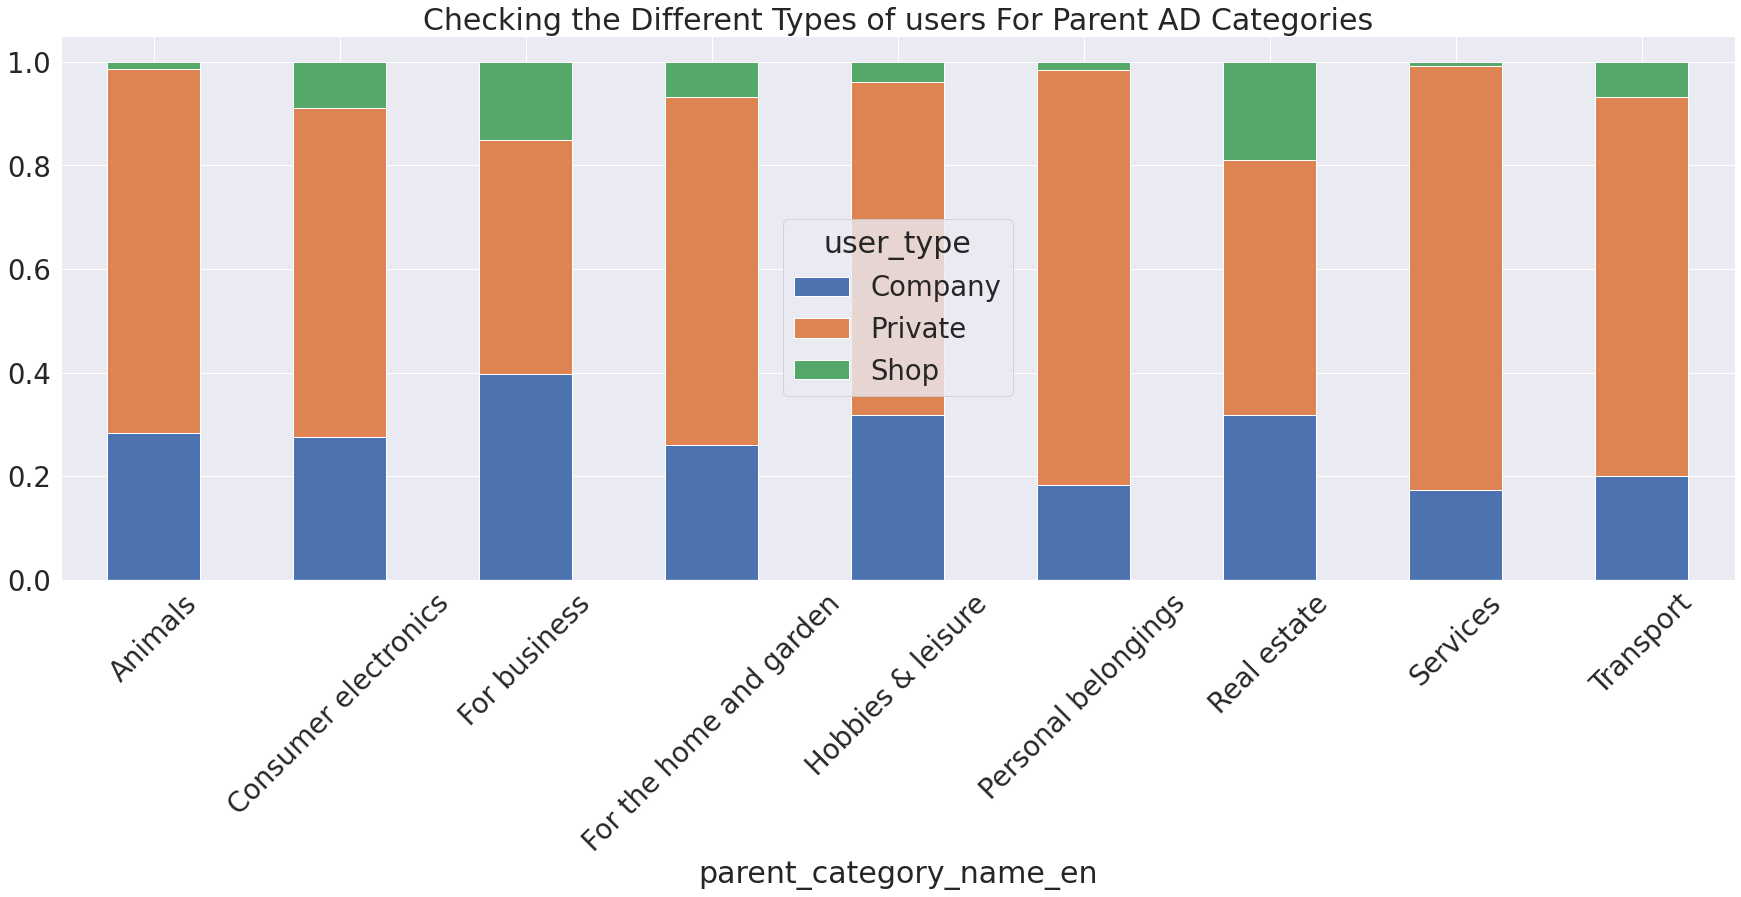

In [ ]:
data = pd.crosstab(tr_df['parent_category_name_en'], tr_df['user_type'])
data.div(data.sum(1).astype(float), axis = 0).plot.bar(stacked = True, figsize = (30, 10))
plt.title('Checking the Different Types of users For Parent AD Categories')
plt.xticks(rotation = 45)

* After Looking at the stacked bar chart, it can be found out that most of the parent ad categories were allotted to Private user type.
* Shops have given lesser amounts of ads in Avito dataset.

### Creating stacked bar charts to check which kind of user has given most ads based on ad categories

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46]),
 <a list of 47 Text major ticklabel objects>)

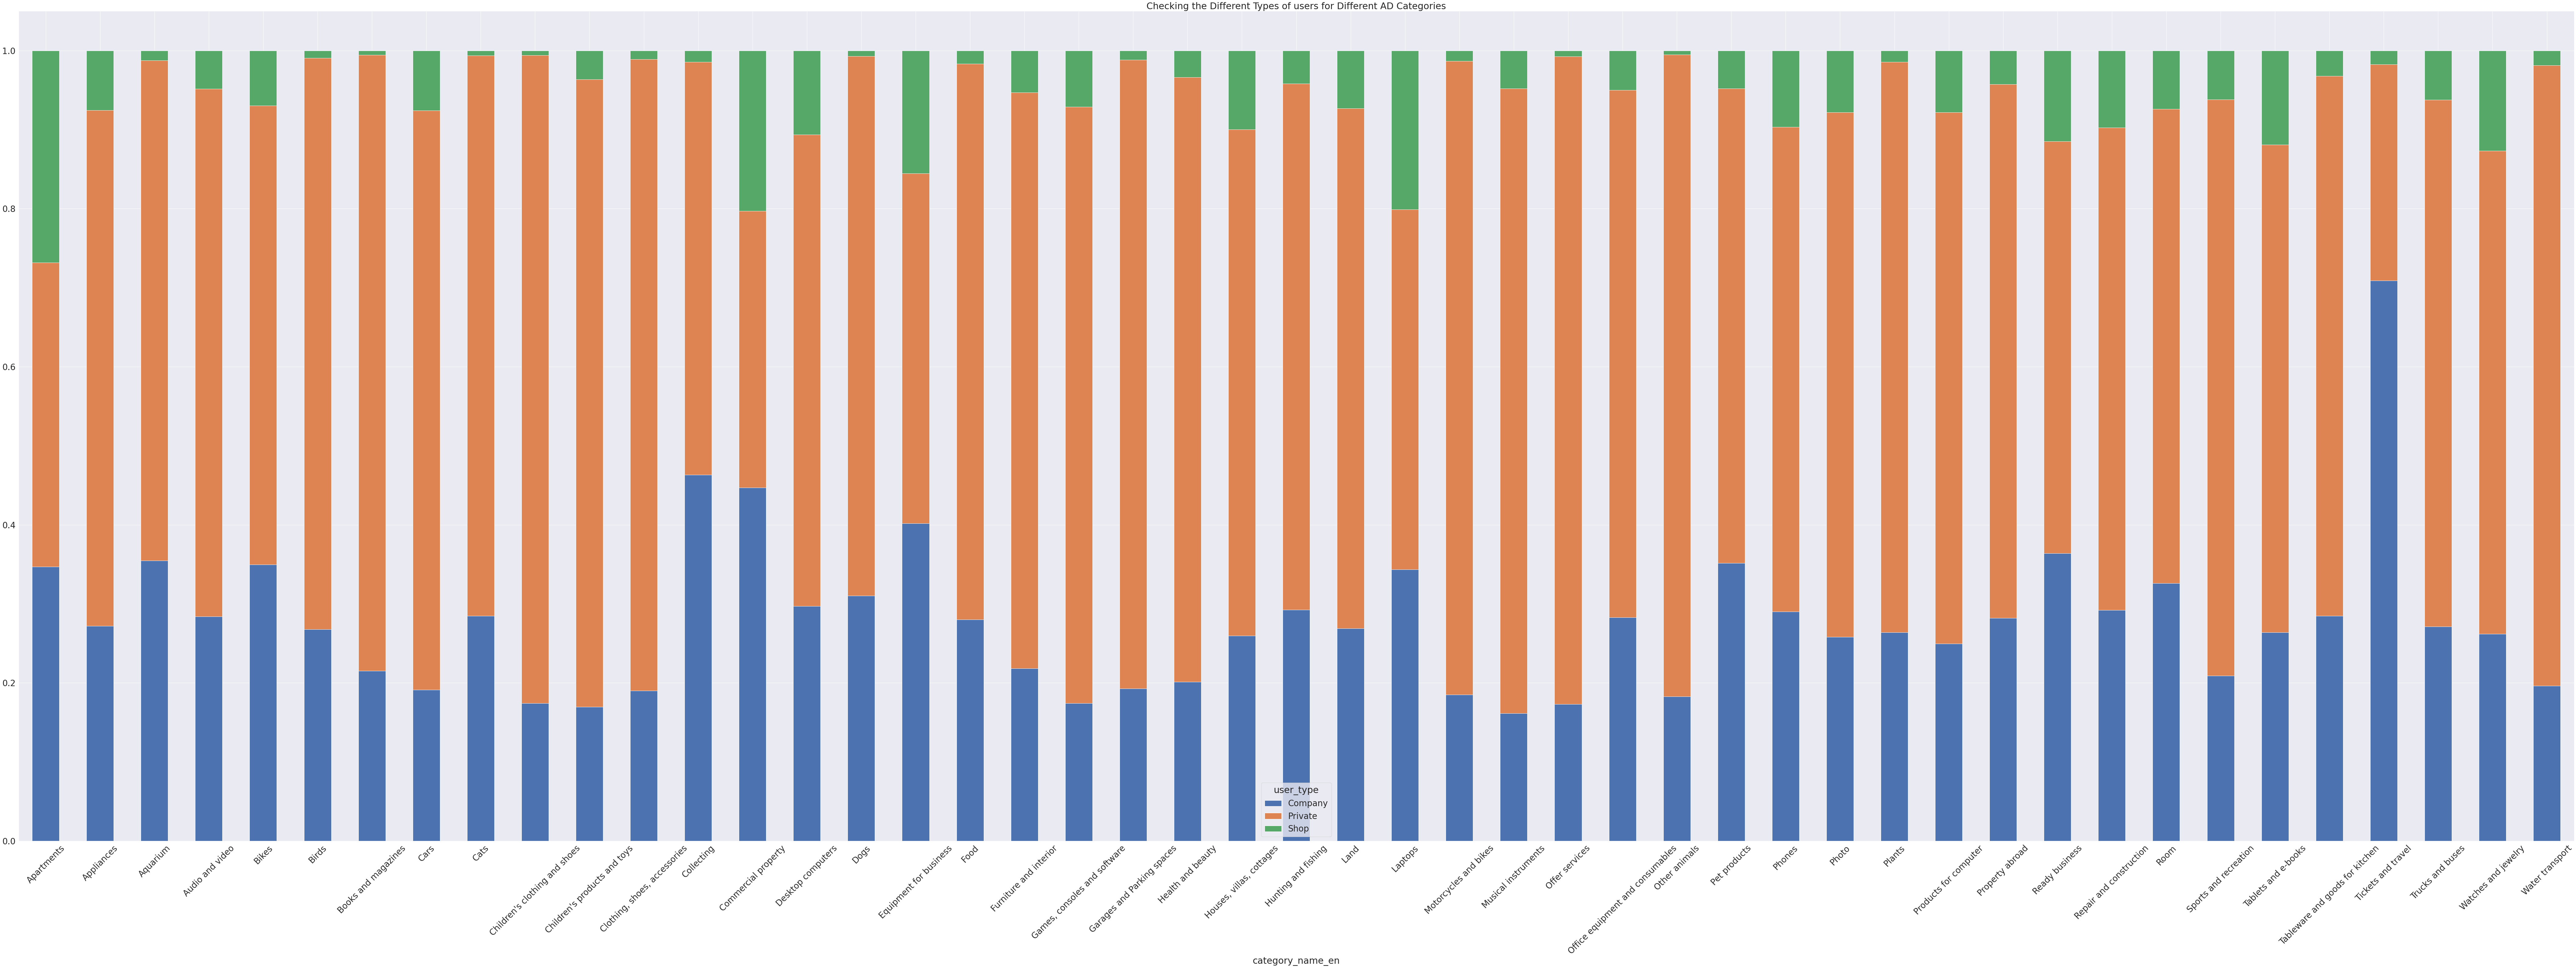

In [ ]:
data = pd.crosstab(tr_df['category_name_en'], tr_df['user_type'])
data.div(data.sum(1).astype(float), axis = 0).plot.bar(stacked = True, figsize = (150, 50))
plt.title('Checking the Different Types of users for Different AD Categories')

plt.xticks(rotation = 45)

* After Looking at the stacked bar chart, it can be found out that most of the ad categories were allotted to Private user type.
* However, Commercial Properties and Tickets and Travel ads were mostly alloted to Comppany
* Shops have given lesser amounts of ads in Avito dataset.


### Most Popular Activation Dates

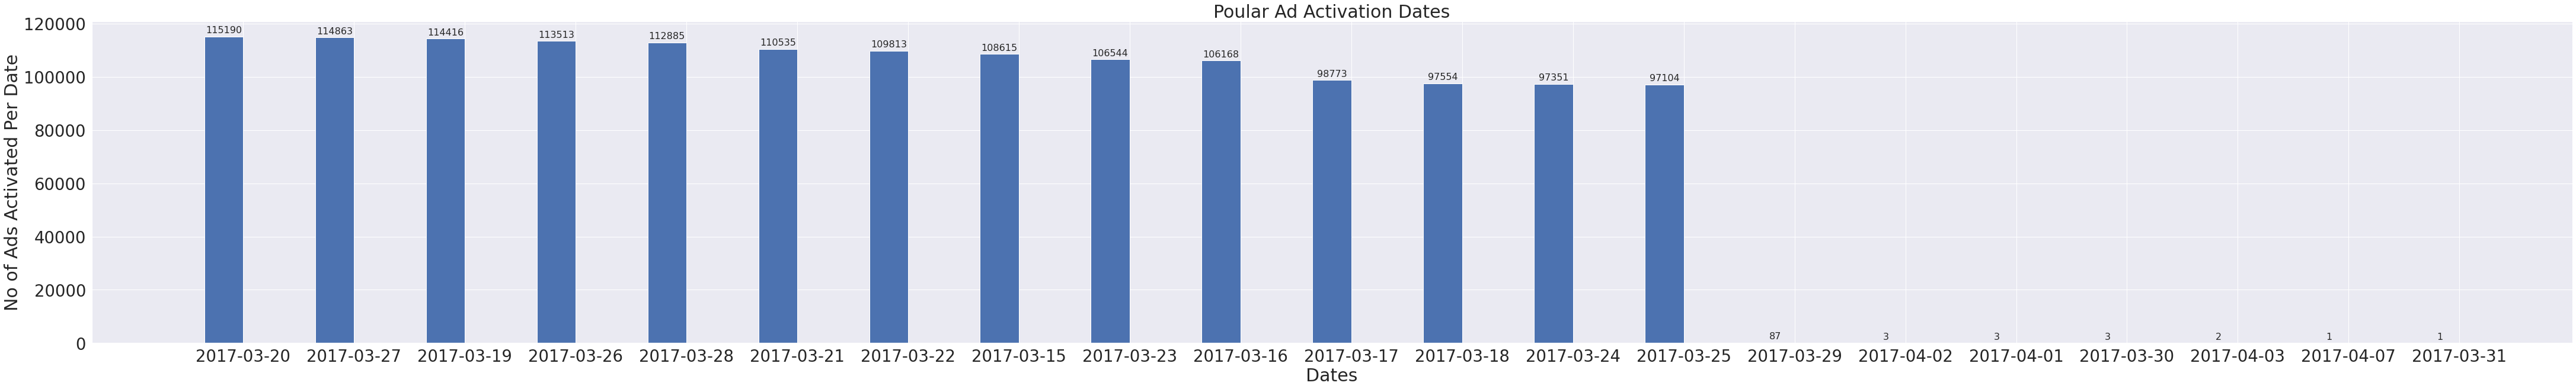

In [ ]:
df_date = tr_df['activation_date'].value_counts().rename_axis('Activation Date').reset_index(name='counts')
p1 = list(df_date['Activation Date'].values)
counts = list(df_date['counts'].values)
fig, ax = plt.subplots(figsize=(75,10))

x=np.arange(len(p1))
ax.set_ylabel('No of Ads Activated Per Date')
ax.set_xlabel('Dates')
ax.set_title('Poular Ad Activation Dates')
ax.set_xticks(x)
ax.set_xticklabels(p1)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='param_1')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')



* 20th March 2017, 27th March 2017, 19th March 2017, 26th March 2017, 28th March 2017 are the to 5 popular ad activation dates
* 2nd April 2017, 1st April 2017, 30th March 2017, 3rd April 2017, 7th April 2017 are the to 5 popular ad activation dates     

### Performing EDA on Datetime Data

In [8]:
tr_df['activation_date'] = pd.to_datetime(tr_df['activation_date'], errors = 'coerce')

In [9]:
# Performing Feature engineering
# Extracting features from activation date feature

# Extracting day from activation date
tr_df['day'] = tr_df['activation_date'].dt.day

# Extracting month from activation date
tr_df['month'] = tr_df['activation_date'].dt.month

# Extracting weekday from activation date
tr_df['weekday'] = tr_df['activation_date'].dt.weekday

# Extracting week from activation date
tr_df['week'] = tr_df['activation_date'].dt.week

# Length of description
tr_df['description'] = tr_df['description'].fillna(" ")
tr_df['description_len'] = tr_df['description'].apply(lambda x : len(x.split()))

# Length of title
tr_df['title'] = tr_df['title'].fillna(" ")
tr_df['title_len'] = tr_df['title'].apply(lambda x : len(x.split()))

# Param_combined and its length
tr_df['param_combined'] = tr_df.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
tr_df['param_combined'] = tr_df['param_combined'].fillna(" ")
tr_df['param_combined_len'] = tr_df['param_combined'].apply(lambda x : len(x.split()))
                                                            
# Character len of text columns
tr_df['description_char'] = tr_df['description'].apply(len)
tr_df['title_char'] = tr_df['title'].apply(len)
tr_df['param_char'] = tr_df['param_combined'].apply(len)                                                            

# Checking the new columns of the dataset
tr_df.columns

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  


Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability', 'day', 'month',
       'weekday', 'week', 'description_len', 'title_len', 'param_combined',
       'param_combined_len', 'description_char', 'title_char', 'param_char'],
      dtype='object')

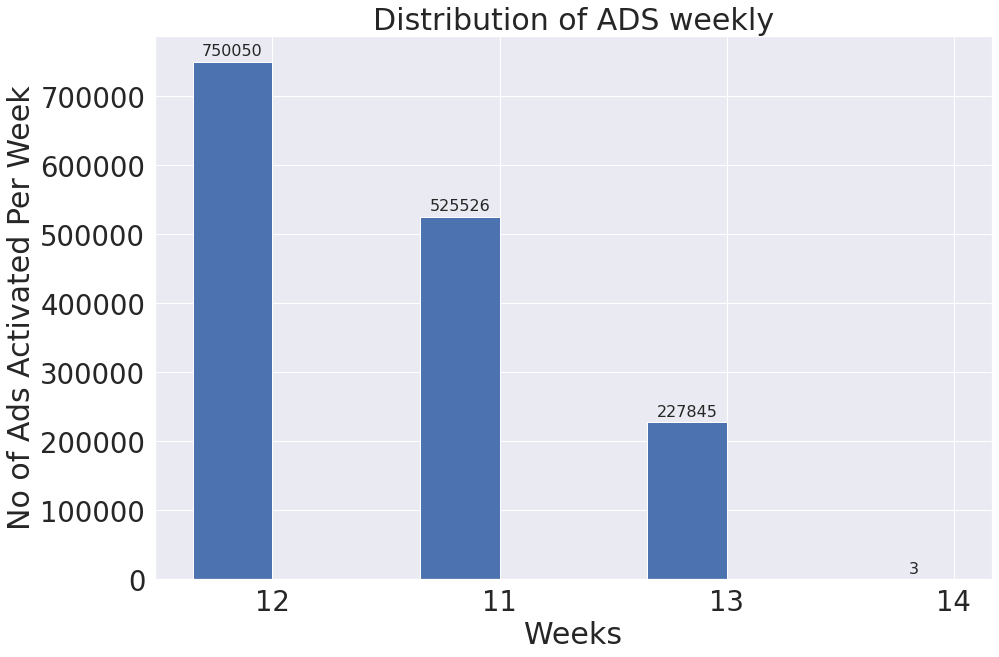

In [ ]:
df_week = tr_df['week'].value_counts().rename_axis('Week').reset_index(name='AD count')
p1 = list(df_week['Week'].values)
counts = list(df_week['AD count'].values)
fig, ax = plt.subplots(figsize=(15,10))

x=np.arange(len(p1))
ax.set_ylabel('No of Ads Activated Per Week')
ax.set_xlabel('Weeks')
ax.set_title('Distribution of ADS weekly')
ax.set_xticks(x)
ax.set_xticklabels(p1)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='week')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')



### Most Busiest Week Days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


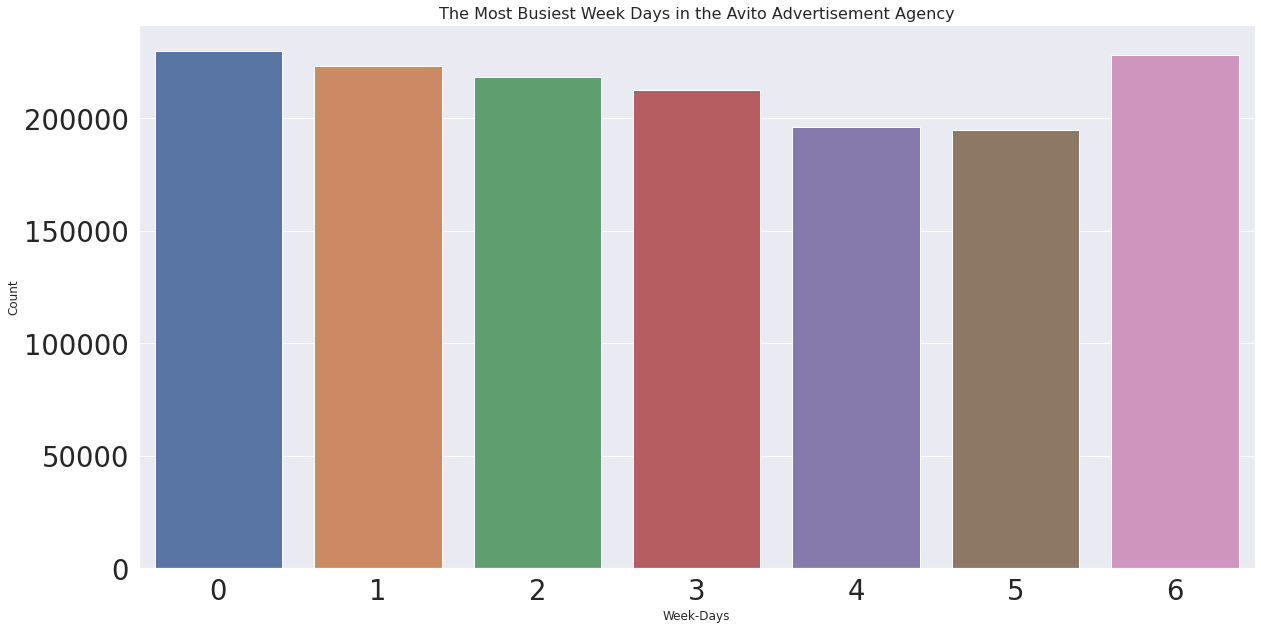

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(tr_df['weekday'])
plt.title('The Most Busiest Week Days in the Avito Advertisement Agency', fontsize = 16)
plt.xlabel('Week-Days', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

### Most Busiest Days

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


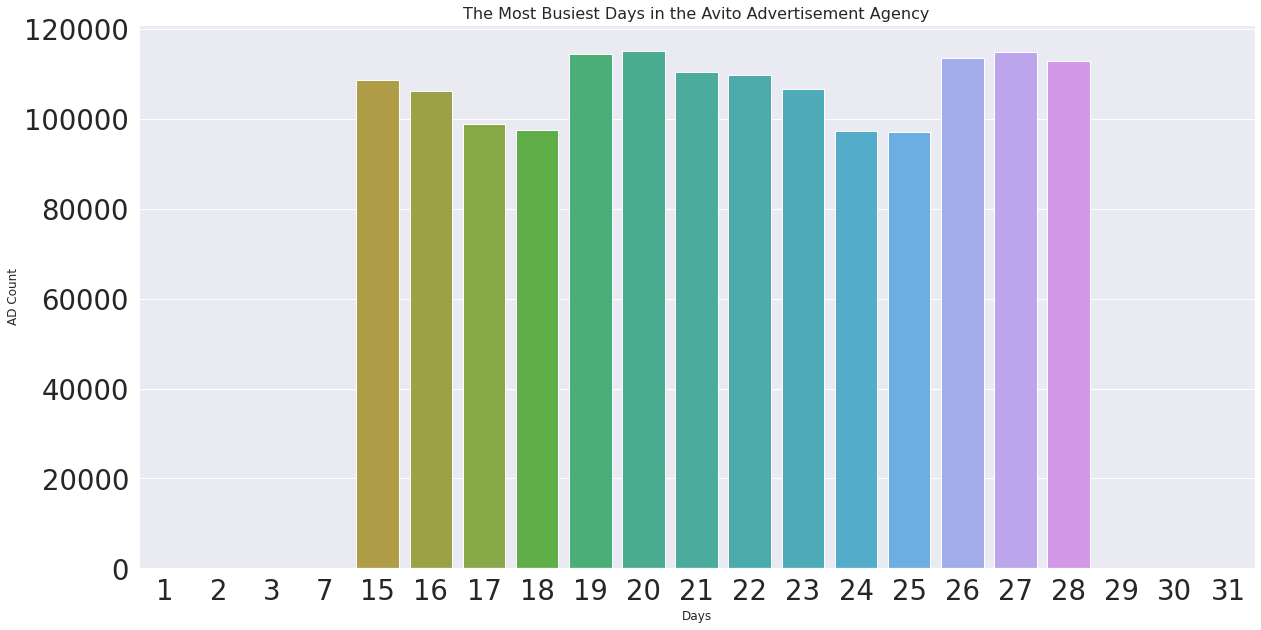

In [ ]:
plt.figure(figsize=(20, 10))
sns.countplot(tr_df['day'])
plt.title('The Most Busiest Days in the Avito Advertisement Agency', fontsize = 16)
plt.xlabel('Days', fontsize = 12)
plt.ylabel('AD Count', fontsize = 12)
plt.show()

* It can be found based on the above countplots that most of the ads were activated during 19th, 20th, 26th, 27th, 28th Days.

### Distribution of Image top 1

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


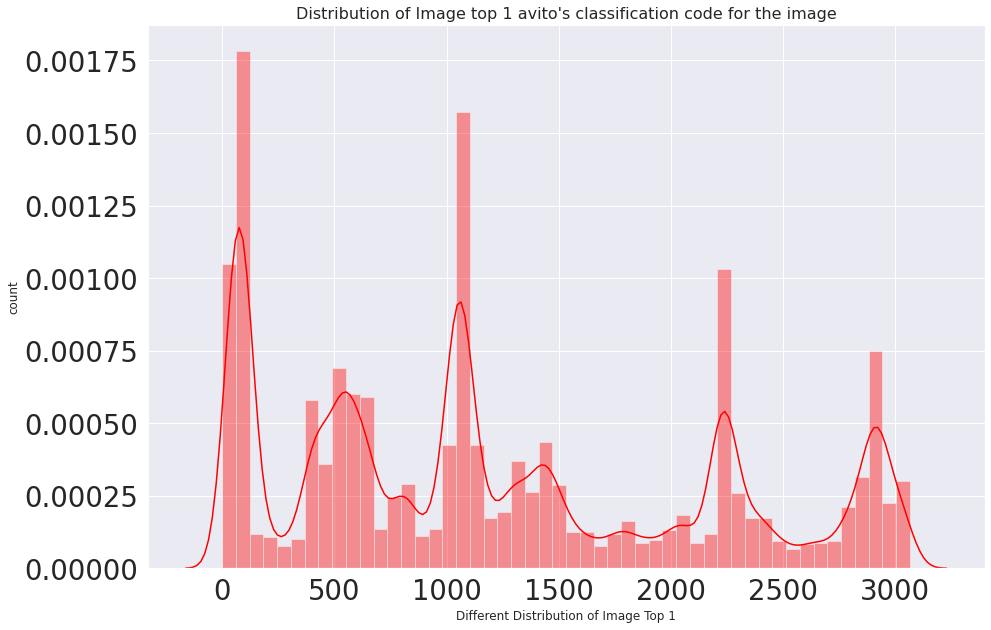

In [ ]:
# filling the missing values present in image_top_1
tr_df['image_top_1'].fillna(tr_df['image_top_1'].median(), inplace = True)

# image_top_1 - Avito's classification code for the image.

plt.figure(figsize=(15, 10))
sns.distplot(tr_df['image_top_1'], color = 'red')
plt.title("Distribution of Image top 1 avito's classification code for the image", fontsize = 16)
plt.xlabel('Different Distribution of Image Top 1', fontsize = 12)
plt.ylabel('count', fontsize = 12)
plt.show()

### Distribution of item sequence number

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


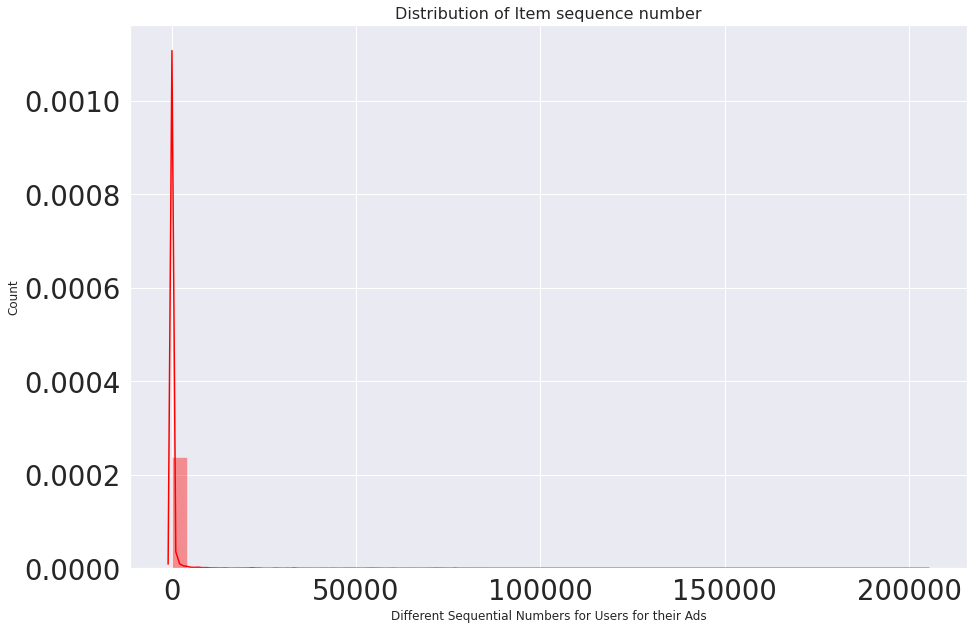

In [ ]:
plt.figure(figsize=(15, 10))
sns.distplot(tr_df['item_seq_number'], color = 'red')
plt.title("Distribution of Item sequence number", fontsize = 16)
plt.xlabel('Different Sequential Numbers for Users for their Ads', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

### Performing EDA on Text Based Data

In [24]:
# length of description
tr_df['description'] = tr_df['description'].fillna(" ")
tr_df['description_length'] = tr_df['description'].apply(lambda x : len(x.split()))

# length of title
tr_df['title'] = tr_df['title'].fillna(" ")
tr_df['title_length'] = tr_df['title'].apply(lambda x : len(x.split()))

# Combining optional ad parameter and getting the total length
tr_df['param_combined'] = tr_df.apply(lambda row: ' '.join([str(row['param_1']), str(row['param_2']),  str(row['param_3'])]), axis=1)
tr_df['param_combined'] = tr_df['param_combined'].fillna(" ")
tr_df['param_combined_length'] = tr_df['param_combined'].apply(lambda x : len(x.split()))
                                                            
# character len of text columns
tr_df['description_charac'] = tr_df['description'].apply(len)
tr_df['title_charac'] = tr_df['title'].apply(len)
tr_df['param_charac'] = tr_df['param_combined'].apply(len)                                                            

# checking the new columns of the dataset
tr_df.columns

Index(['item_id', 'user_id', 'region', 'city', 'parent_category_name',
       'category_name', 'param_1', 'param_2', 'param_3', 'title',
       'description', 'price', 'item_seq_number', 'activation_date',
       'user_type', 'image', 'image_top_1', 'deal_probability', 'day', 'month',
       'weekday', 'week', 'description_len', 'title_len', 'param_combined',
       'param_combined_len', 'description_char', 'title_char', 'param_char',
       'description_length', 'title_length', 'param_combined_length',
       'description_charac', 'title_charac', 'param_charac', 'region_en',
       'parent_category_name_en', 'category_name_en'],
      dtype='object')

### Distribution of Title Length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


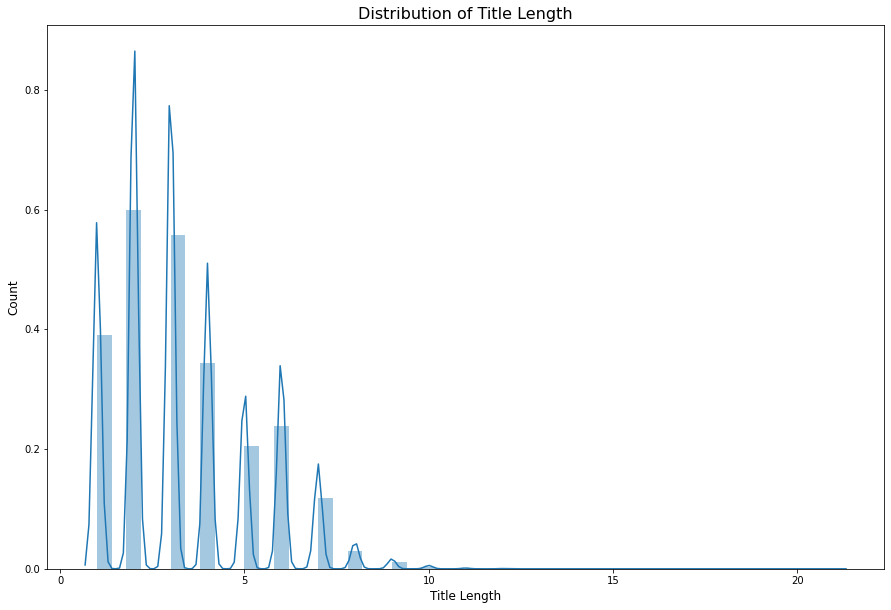

In [11]:
plt.figure(figsize=(15, 10))
sns.distplot(tr_df['title_length'])
plt.title('Distribution of Title Length', fontsize = 16)
plt.xlabel('Title Length', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

### Distribution of Description Length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


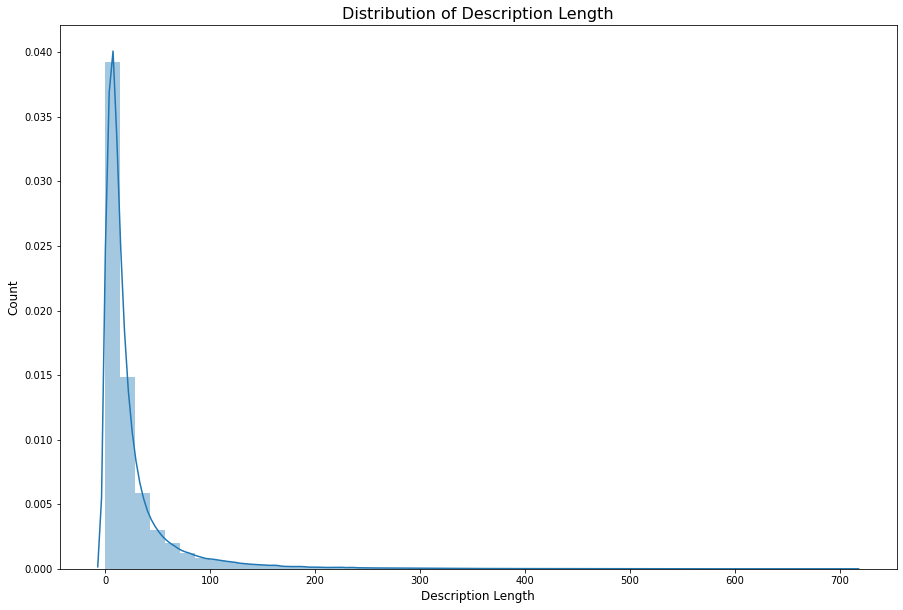

In [12]:
plt.figure(figsize=(15, 10))
sns.distplot(tr_df['description_length'])
plt.title('Distribution of Description Length', fontsize = 16)
plt.xlabel('Description Length', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

### Distribution of Param Length

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


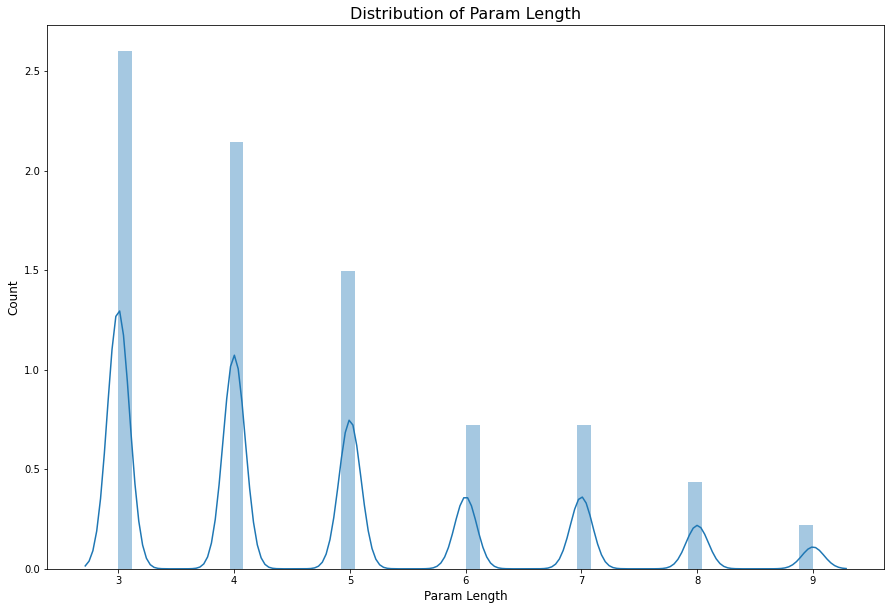

In [25]:
plt.figure(figsize=(15, 10))
sns.distplot(tr_df['param_combined_length'])
plt.title('Distribution of Param Length', fontsize = 16)
plt.xlabel('Param Length', fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.show()

### Generating WordClud For Text Features

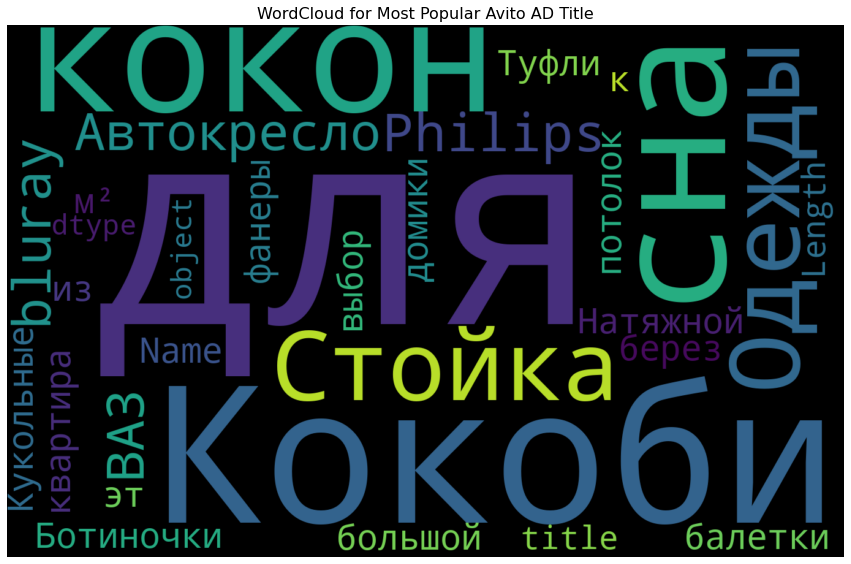

In [15]:
# making a wordscloud for title
stopwords = set(STOPWORDS)

plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords = stopwords,
                      max_words = 250,
                      width = 1366,
                      height = 868,).generate(str(tr_df['title']))

print(wordcloud)
plt.title('WordCloud for Most Popular Avito AD Title', fontsize = 16)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

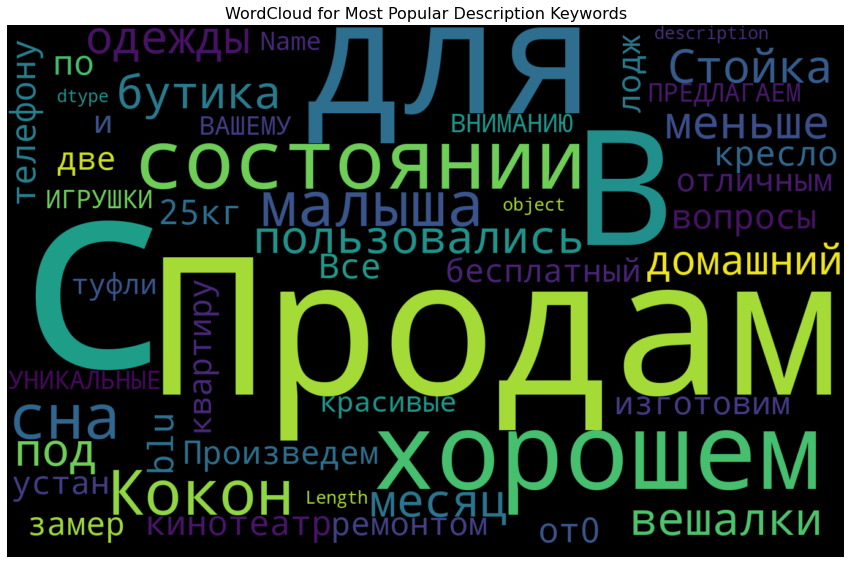

In [16]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords = stopwords,
                      max_words = 250,
                      width = 1366,
                      height = 868,).generate(str(tr_df['description']))

print(wordcloud)
plt.title('WordCloud for Most Popular Description Keywords', fontsize = 16)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

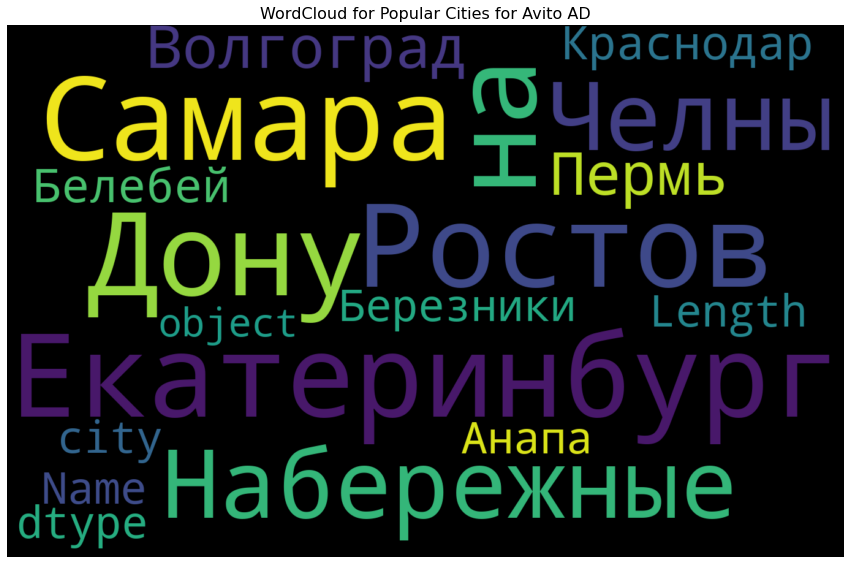

In [17]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords = stopwords,
                      max_words = 250,
                      width = 1366,
                      height = 868,).generate(str(tr_df['city']))

print(wordcloud)
plt.title('WordCloud for Popular Cities for Avito AD', fontsize = 16)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

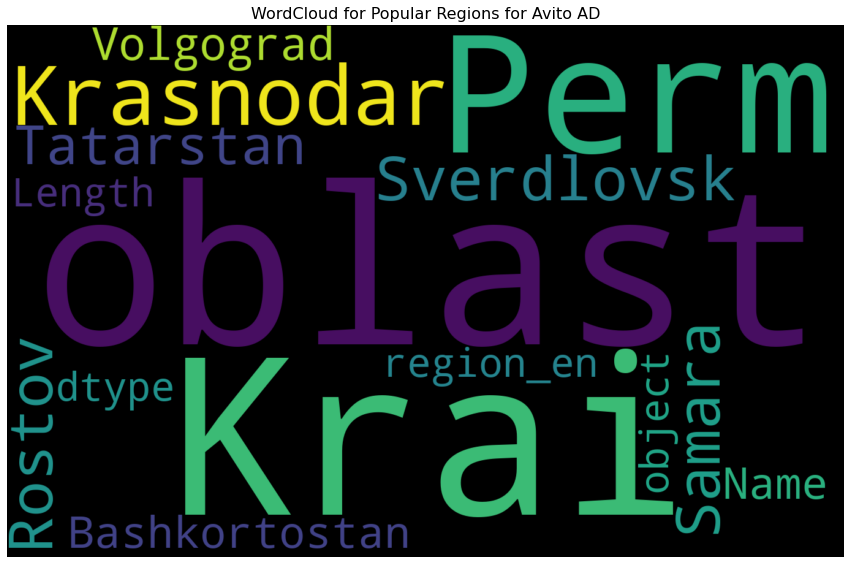

In [20]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords = stopwords,
                      max_words = 150,
                      width = 1366,
                      height = 868,).generate(str(tr_df['region_en']))

print(wordcloud)
plt.title('WordCloud for Popular Regions for Avito AD', fontsize = 16)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

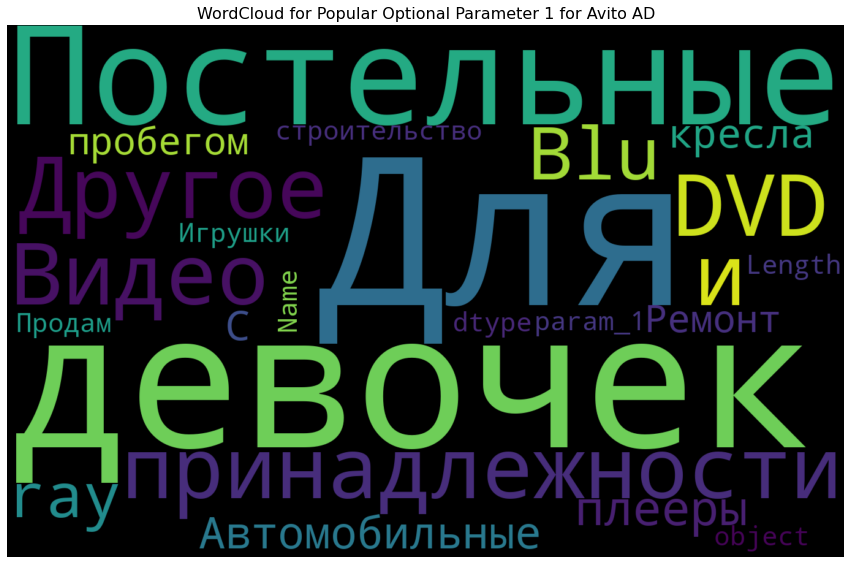

In [27]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords = stopwords,
                      max_words = 150,
                      width = 1366,
                      height = 868,).generate(str(tr_df['param_1']))

print(wordcloud)
plt.title('WordCloud for Popular Optional Parameter 1 for Avito AD', fontsize = 16)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

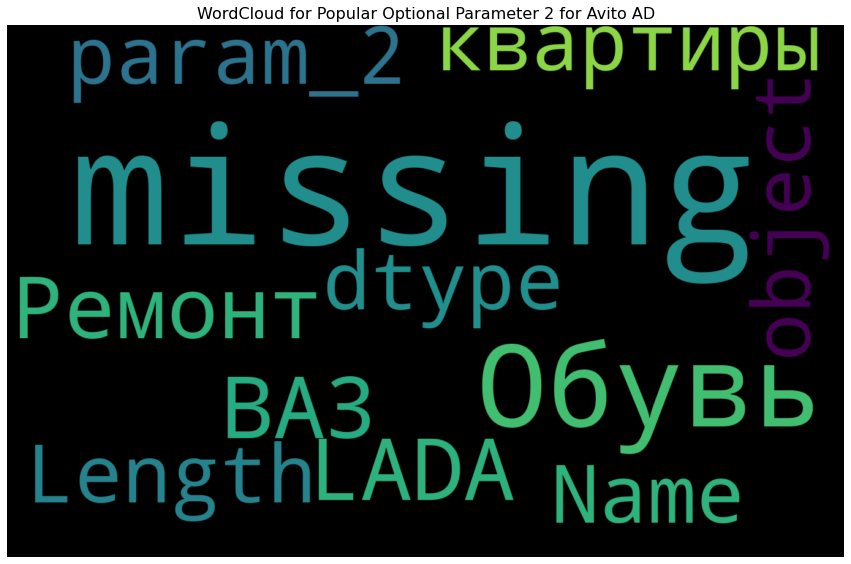

In [26]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords = stopwords,
                      max_words = 150,
                      width = 1366,
                      height = 868,).generate(str(tr_df['param_2']))

print(wordcloud)
plt.title('WordCloud for Popular Optional Parameter 2 for Avito AD', fontsize = 16)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

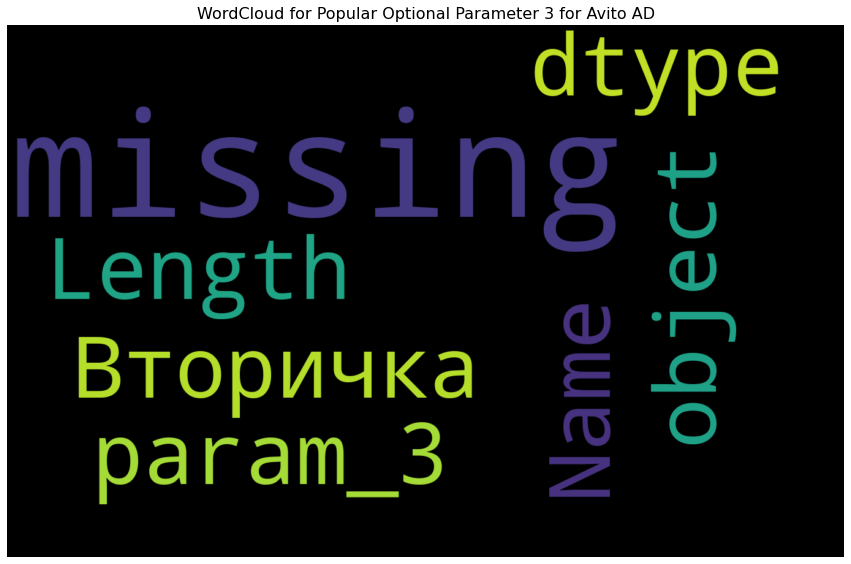

In [28]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords = stopwords,
                      max_words = 150,
                      width = 1366,
                      height = 868,).generate(str(tr_df['param_3']))

print(wordcloud)
plt.title('WordCloud for Popular Optional Parameter 3 for Avito AD', fontsize = 16)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

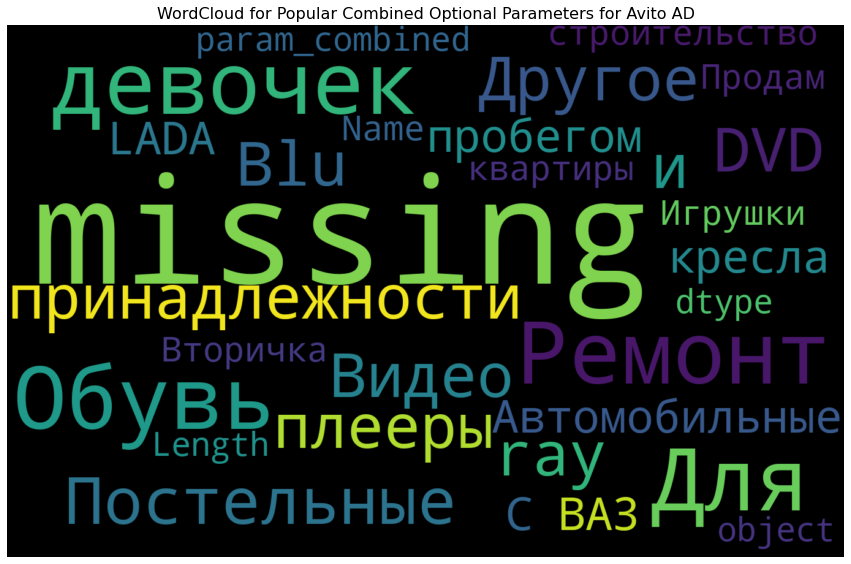

In [29]:
plt.figure(figsize=(15, 10))
wordcloud = WordCloud(stopwords = stopwords,
                      max_words = 150,
                      width = 1366,
                      height = 868,).generate(str(tr_df['param_combined']))

print(wordcloud)
plt.title('WordCloud for Popular Combined Optional Parameters for Avito AD', fontsize = 16)
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')

### Checking How many Ads have Images

In [36]:
df_img = tr_df['image'].value_counts(dropna=False).rename_axis('Images Source').reset_index(name='Image Counts')
df_img = df_img.head(3)


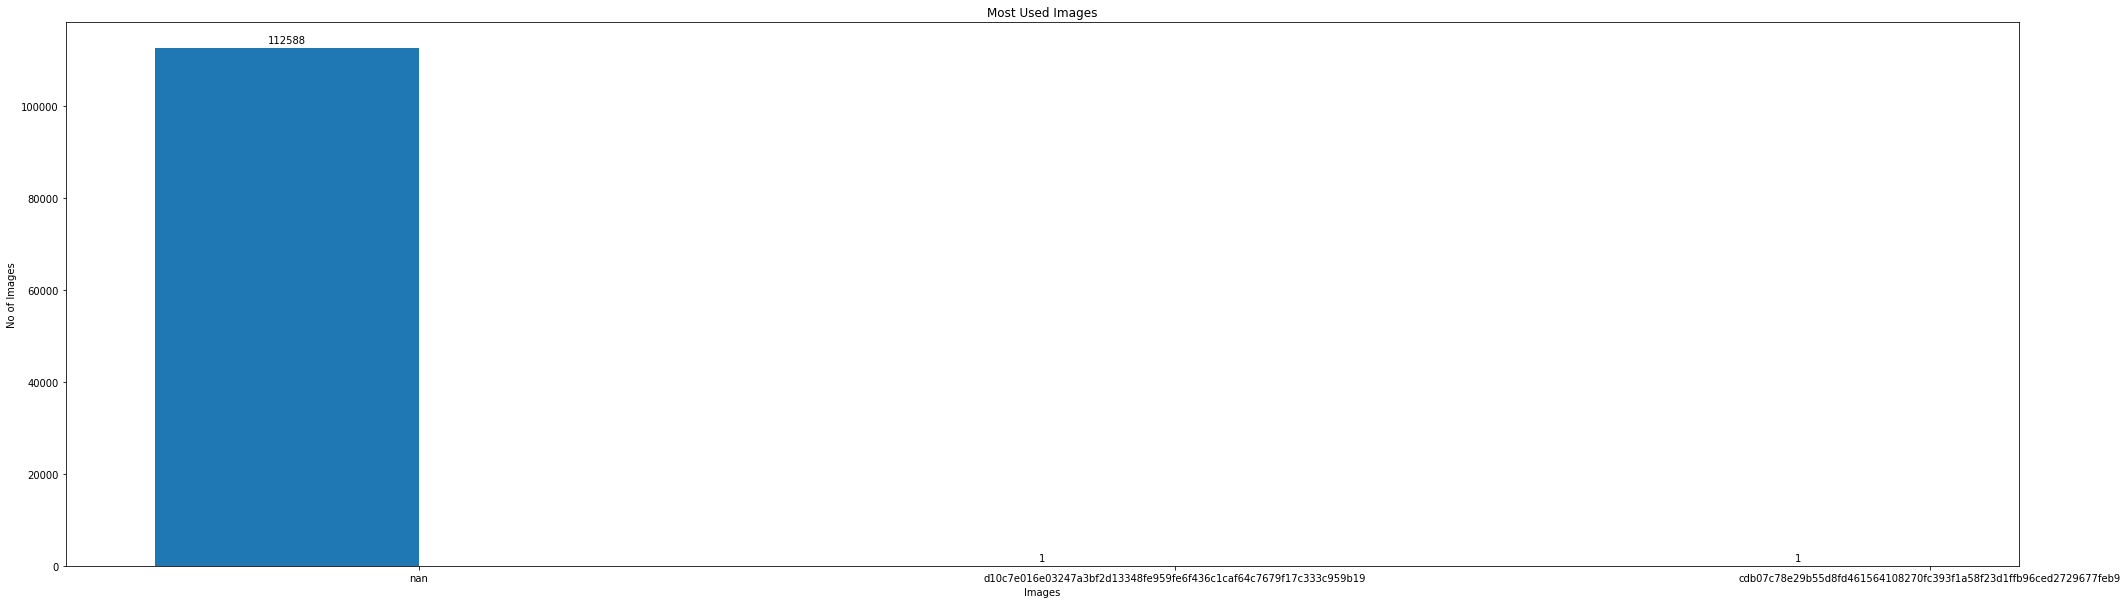

In [37]:
img = list(df_img['Images Source'].values)
counts = list(df_img['Image Counts'].values)
fig, ax = plt.subplots(figsize=(35,10))

x=np.arange(len(img))
ax.set_ylabel('No of Images')
ax.set_xlabel('Images')
ax.set_title('Most Used Images')
ax.set_xticks(x)
ax.set_xticklabels(img)
width = 0.35


pps = ax.bar(x - width/2, counts, width, label='Images')
for p in pps:
   height = p.get_height()
   ax.annotate('{}'.format(height),
      xy=(p.get_x() + p.get_width() / 2, height),
      xytext=(0, 3), # 3 points vertical offset
      textcoords="offset points",
      ha='center', va='bottom')

* There are 112,588 ads which do not have any images.
* For the rest of the ads, each unique image is given.